In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import numpy as np

pd.options.mode.chained_assignment = None

# Something vs Residue, for a certain pair

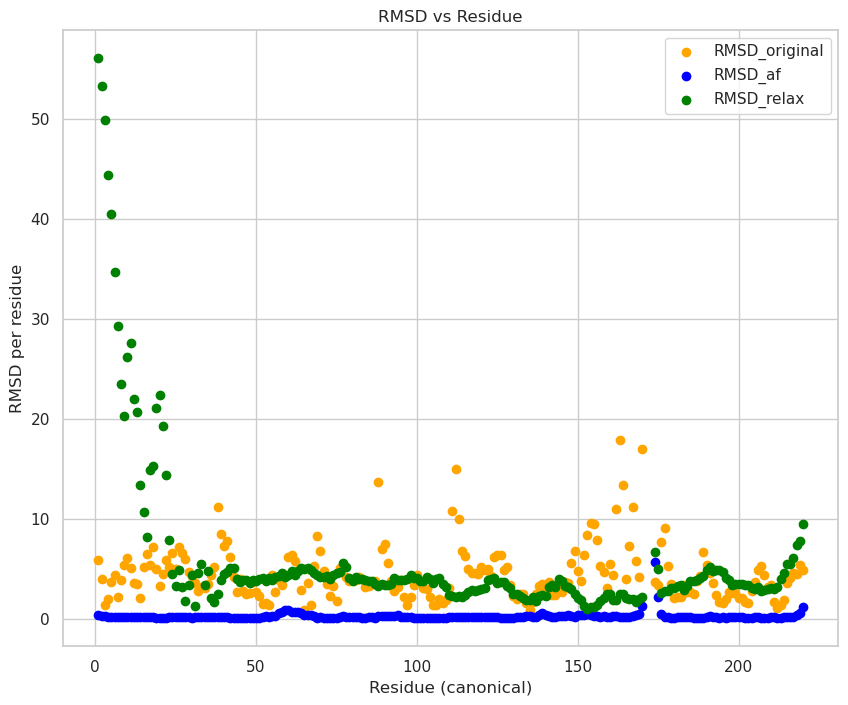

In [16]:
# plot rmsd vs residue
# for a certain pair

df = pd.read_csv("pairs_csv/pair_10.csv")
plt.figure(figsize = (10, 8))
plt.scatter(df['Residue'], df['RMSD_original'], color = 'orange', label = 'RMSD_original')
plt.scatter(df['Residue'], df['RMSD_af'], color = 'blue', label = 'RMSD_af')
plt.scatter(df['Residue'], df['RMSD_relax'], color = 'green', label = 'RMSD_relax')

plt.xlabel('Residue (canonical)')
plt.ylabel('RMSD per residue')
plt.title('RMSD vs Residue')
plt.legend()

#plt.savefig("plots/RMSDvsResidue/pair1.png")

plt.show()

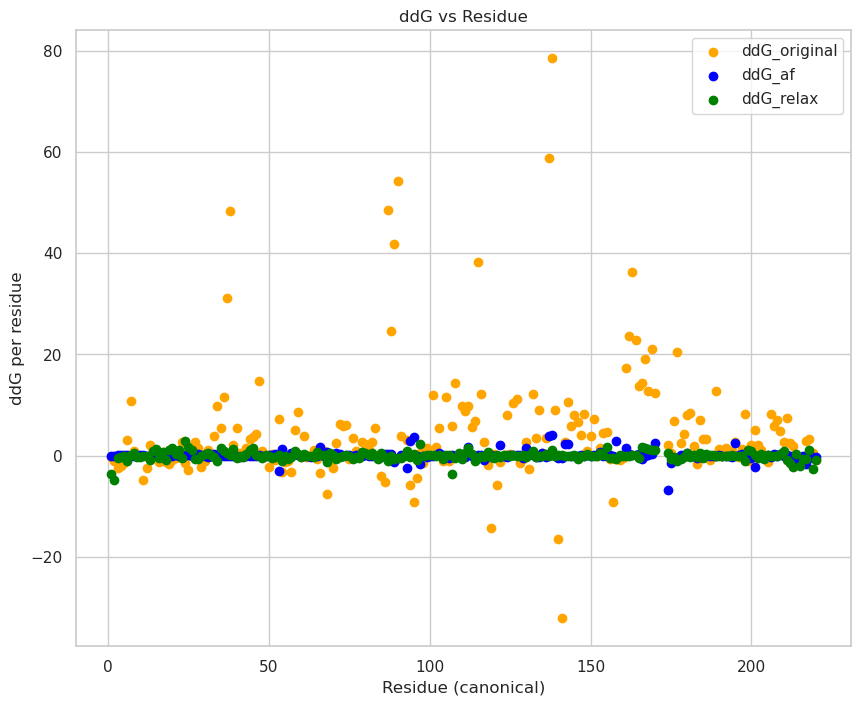

In [5]:
# plot ddG vs residue
# for a certain pair

df = pd.read_csv("pairs_csv/pair_10.csv")
plt.figure(figsize = (10, 8))
plt.scatter(df['Residue'], df['ddG_original'], color = 'orange', label = 'ddG_original')
plt.scatter(df['Residue'], df['ddG_af'], color = 'blue', label = 'ddG_af')
plt.scatter(df['Residue'], df['ddG_relax'], color = 'green', label = 'ddG_relax')

plt.xlabel('Residue (canonical)')
plt.ylabel('ddG per residue')
plt.title('ddG vs Residue')
plt.legend()

#plt.savefig("plots/ddGvsResidue/pair1.png")

plt.show()

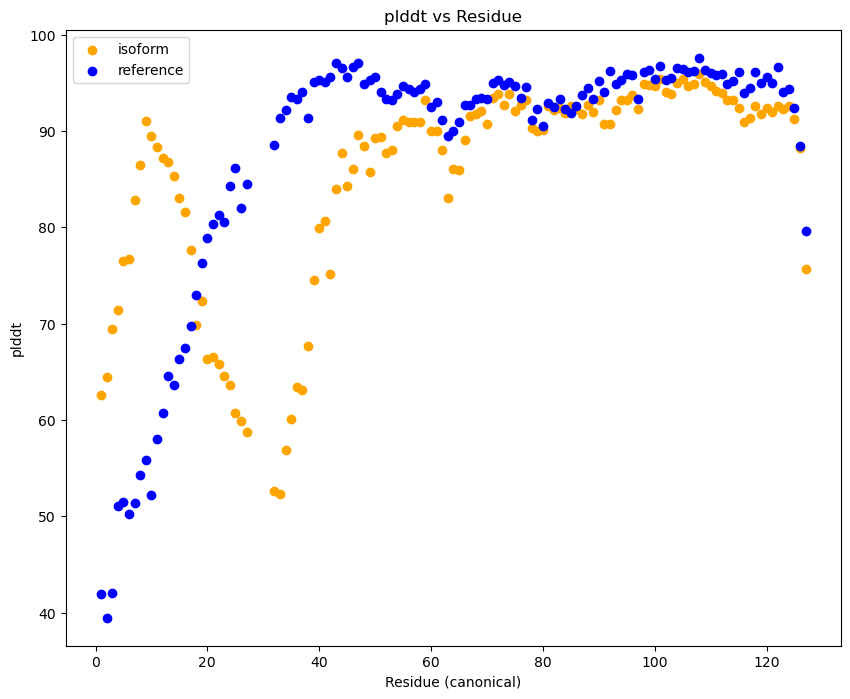

In [2]:
# plot plddt_iso vs residue
# for a certain pair

df = pd.read_csv("pairs_csv/pair_6.csv")
plt.figure(figsize = (10, 8))
plt.scatter(df['Residue'], df['plddt_iso'], color = 'orange', label = 'isoform')
plt.scatter(df['Residue'], df['plddt_ref'], color = 'blue', label = 'reference')

plt.xlabel('Residue (canonical)')
plt.ylabel('plddt')
plt.title('plddt vs Residue')
plt.legend()

#plt.savefig("plots/ddGvsResidue/pair1.png")

plt.show()

# RMSD vs RMSD_original, for a certain pair

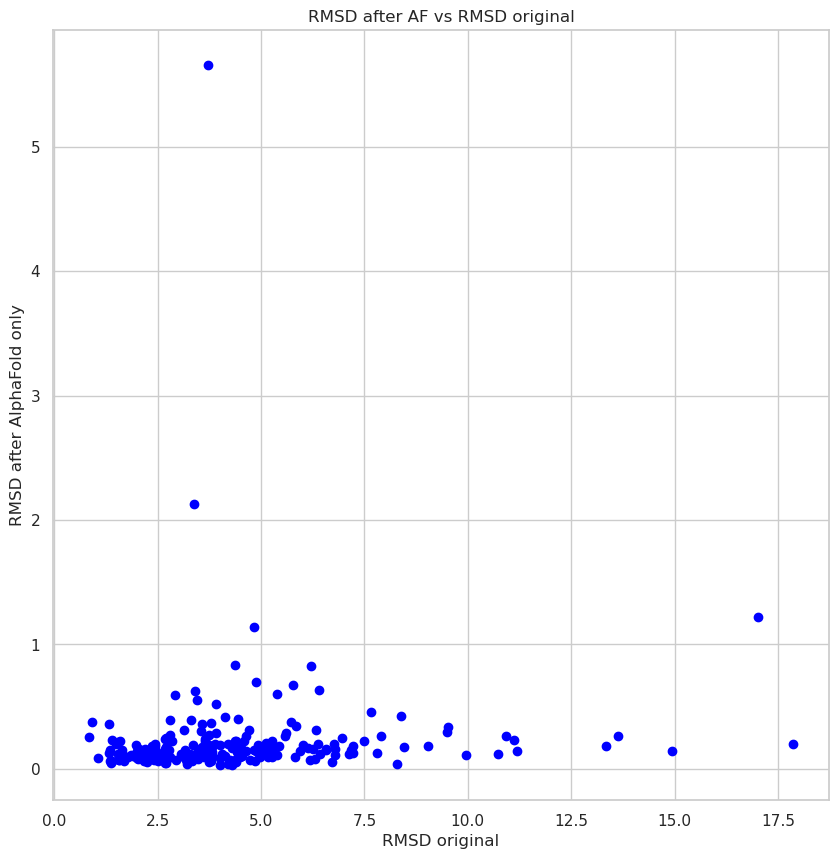

In [6]:
# plot RMSD_af vs RMSD_original
# for a certain pair

df = pd.read_csv("pairs_csv/pair_10.csv")
plt.figure(figsize = (10, 10))
plt.scatter(df['RMSD_original'], df['RMSD_af'], color = 'blue')

plt.xlabel('RMSD original')
plt.ylabel('RMSD after AlphaFold only')
plt.title('RMSD after AF vs RMSD original')

#plt.savefig("plots/RMSD_afvsoriginal/pair5.png")

plt.show()

In [19]:
df['RMSD_original'].corr(df['RMSD_af'], method = "kendall")

0.42477664179791846

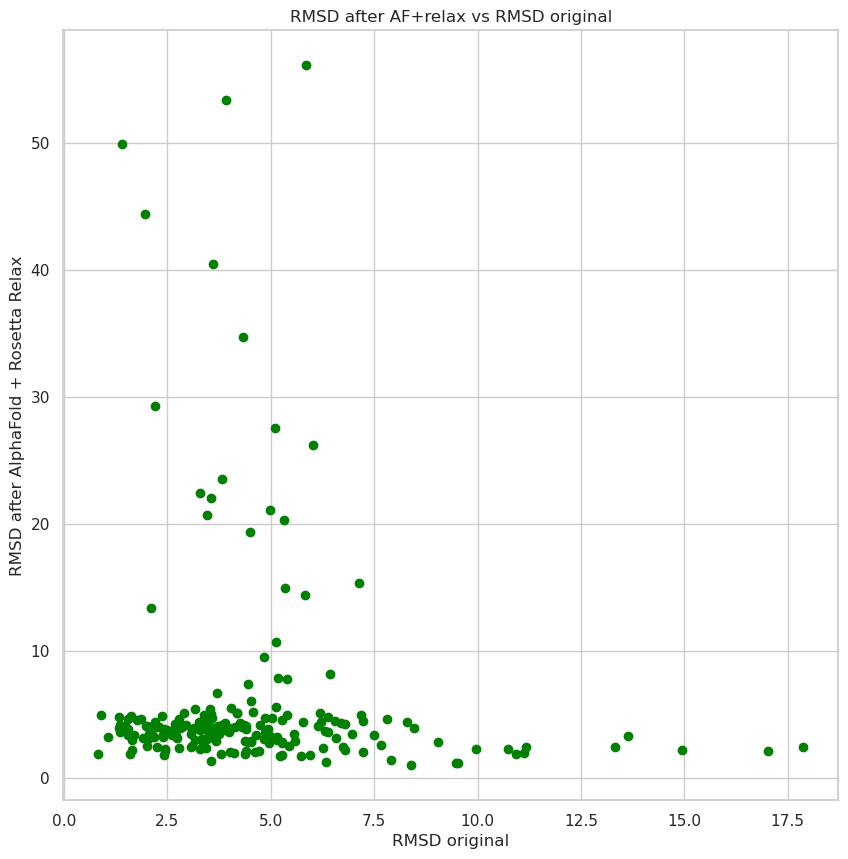

In [15]:
# plot RMSD_relax vs RMSD_original
# for a certain pair

df = pd.read_csv("pairs_csv/pair_10.csv")
plt.figure(figsize = (10, 10))
plt.scatter(df['RMSD_original'], df['RMSD_relax'], color = 'green')

plt.xlabel('RMSD original')
plt.ylabel('RMSD after AlphaFold + Rosetta Relax')
plt.title('RMSD after AF+relax vs RMSD original')

#plt.savefig("plots/RMSD_relaxvsoriginal/pair5.png")

plt.show()

In [20]:
df['RMSD_original'].corr(df['RMSD_relax'], method = "kendall")

0.20987381412913328

# RMSD vs RMSD, for all pairs

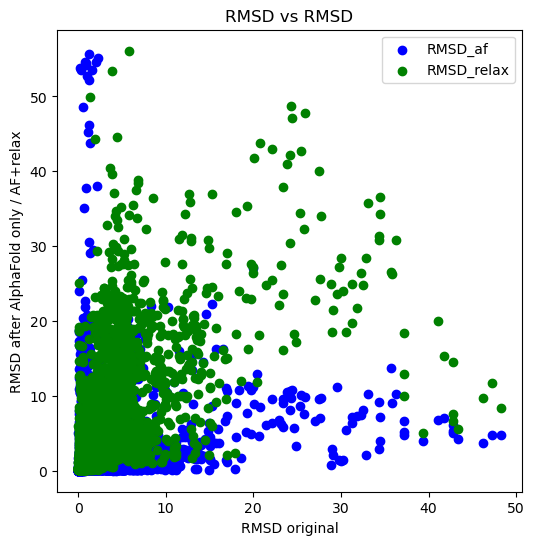

In [9]:
# plot RMSD_af vs RMSD_original

pair_df = pd.read_csv("pairs_csv/pairs_all.csv")

plt.figure(figsize = (6, 6))
plt.scatter(pair_all_df['RMSD_original'], pair_all_df['RMSD_af'], color = 'blue', label = 'RMSD_af')
plt.scatter(pair_all_df['RMSD_original'], pair_all_df['RMSD_relax'], color = 'green', label = 'RMSD_relax')

plt.xlabel('RMSD original')
plt.ylabel('RMSD after AlphaFold only / AF+relax')
plt.title('RMSD vs RMSD')
plt.legend()

plt.show()

In [15]:
print(pair_all_df['RMSD_original'].corr(pair_all_df['RMSD_af'], method = "kendall"))
print(pair_all_df['RMSD_original'].corr(pair_all_df['RMSD_relax'], method = "kendall"))

0.4597966237689102
0.5802991479665844


# ddG vs ddG, for a certain pair

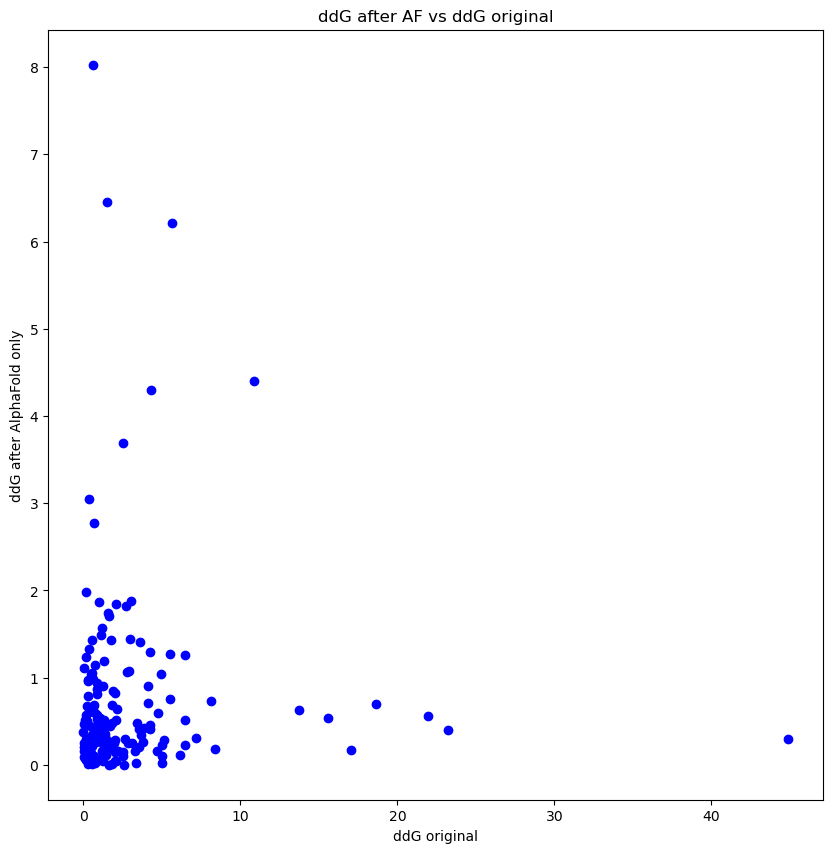

In [4]:
# plot ddG_af vs ddG_original
# for a certain pair

df = pd.read_csv("pairs_csv/pair_8.csv")
plt.figure(figsize = (10, 10))
plt.scatter(abs(df['ddG_original']), abs(df['ddG_af']), color = 'blue')

plt.xlabel('ddG original')
plt.ylabel('ddG after AlphaFold only')
plt.title('ddG after AF vs ddG original')

#plt.savefig("plots/RMSD_afvsoriginal/pair5.png")

plt.show()

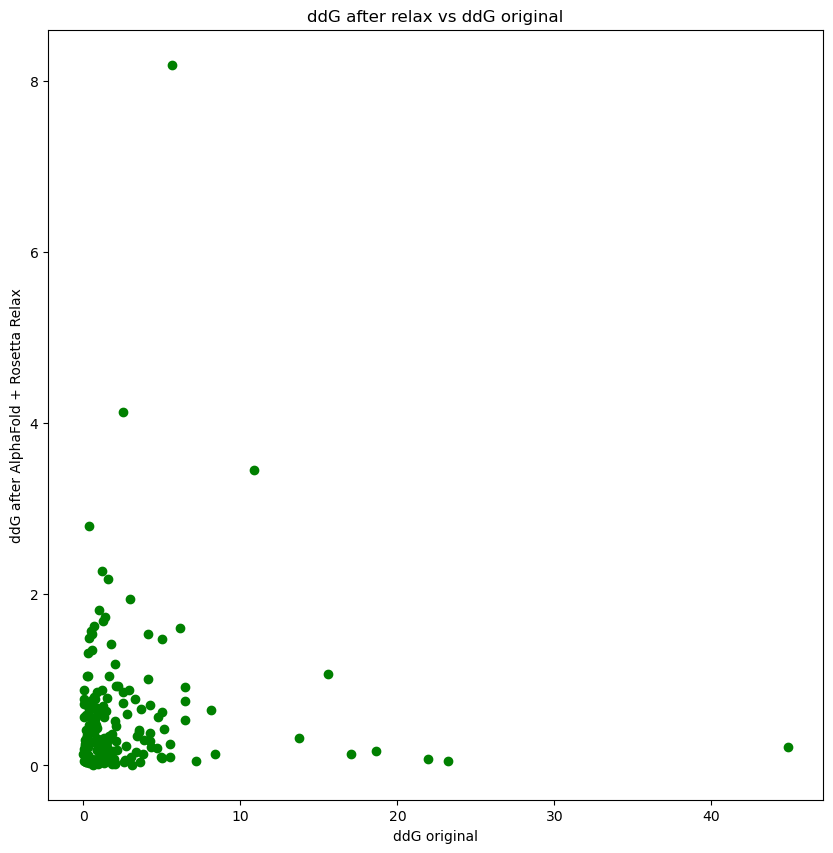

In [5]:
# plot ddG_af vs ddG_original
# for a certain pair

df = pd.read_csv("pairs_csv/pair_8.csv")
plt.figure(figsize = (10, 10))
plt.scatter(abs(df['ddG_original']), abs(df['ddG_relax']), color = 'green')

plt.xlabel('ddG original')
plt.ylabel('ddG after AlphaFold + Rosetta Relax')
plt.title('ddG after relax vs ddG original')

#plt.savefig("plots/RMSD_afvsoriginal/pair5.png")

plt.show()

# corr vs plddt

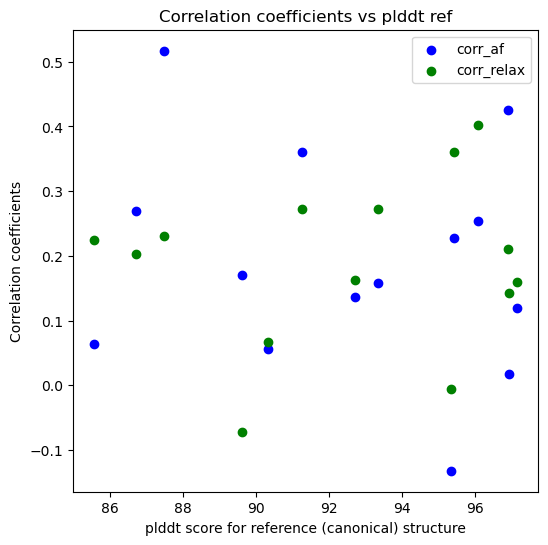

In [3]:
# plot Corr(af) and Corr(relax) vs plddt ref

df_corr = pd.read_csv("correlations_csv/rmsd.csv")

plt.figure(figsize = (6, 6))
plt.scatter(df_corr['plddt_ref'], df_corr['corr_af'], color = 'blue', label = 'corr_af')
plt.scatter(df_corr['plddt_ref'], df_corr['corr_relax'], color = 'green', label = 'corr_relax')

plt.xlabel('plddt score for reference (canonical) structure')
plt.ylabel('Correlation coefficients')
plt.title('Correlation coefficients vs plddt ref')
plt.legend()
plt.show()

# Corr vs Corr

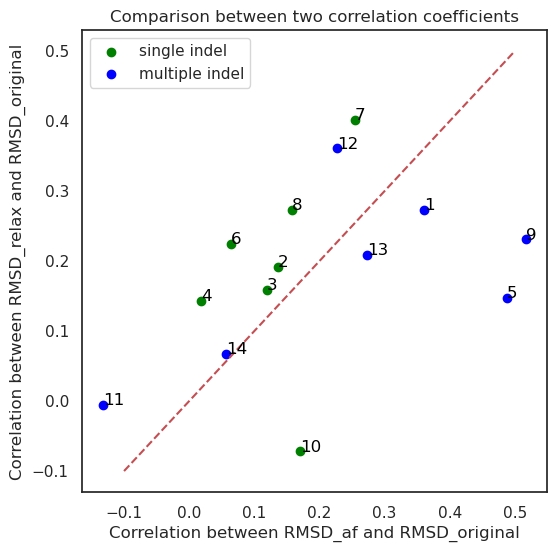

In [7]:
# plot Correlations (AF) vs Correlations (relax)

df_corr = pd.read_csv("correlations_csv/rmsd.csv")

sns.set(style = 'white')
plt.figure(figsize = (6, 6))
plt.scatter(df_corr[df_corr['indel_num']==1]['corr_af'], df_corr[df_corr['indel_num']==1]['corr_relax'], color = 'green', label = 'single indel')
plt.scatter(df_corr[df_corr['indel_num']!=1]['corr_af'], df_corr[df_corr['indel_num']!=1]['corr_relax'], color = 'blue', label = 'multiple indel')
plt.plot([-0.1, 0.5], [-0.1, 0.5], 'r--')

for index, row in df_corr.iterrows():
    plt.text(row['corr_af'], row['corr_relax'], int(row['pair']), color = 'black')

plt.xlabel('Correlation between RMSD_af and RMSD_original')
plt.ylabel('Correlation between RMSD_relax and RMSD_original')
plt.title('Comparison between two correlation coefficients')
plt.legend()

plt.savefig('plots/CorrvsCorr/AFvsRelax.png')

plt.show()

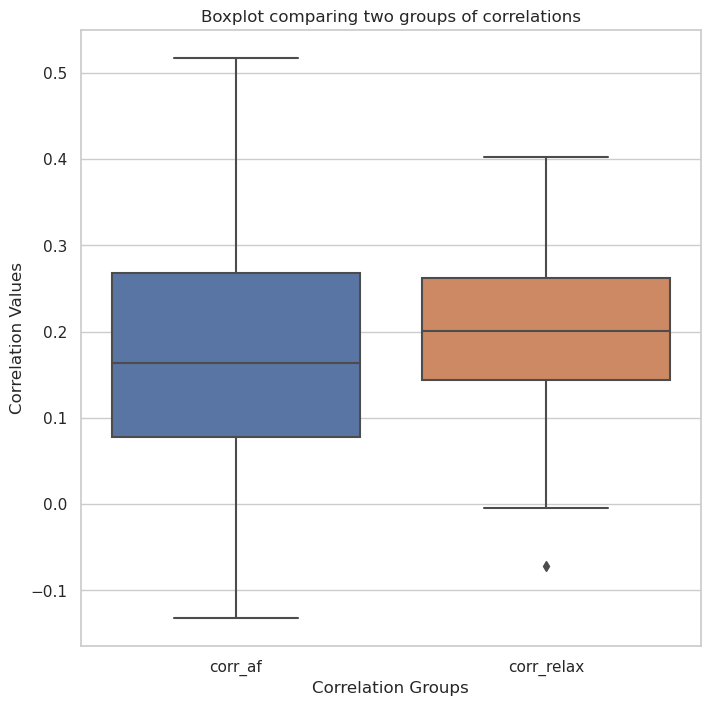

In [5]:
# plot Correlations (AF) vs Correlations (relax)
# boxplot

df_corr = pd.read_csv("correlations_csv/rmsd.csv")

df_corr_boxplot = df_corr[['corr_af', 'corr_relax']]
df_corr_boxplot = df_corr_boxplot.melt(var_name = "Columns", value_name = "Values")

sns.set(style = 'whitegrid')
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Columns', y = 'Values', data = df_corr_boxplot)

plt.title('Boxplot comparing two groups of correlations')
plt.xlabel('Correlation Groups')
plt.ylabel('Correlation Values')

plt.savefig('plots/CorrvsCorr/AFvsRelax_boxplot.png')

plt.show()

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


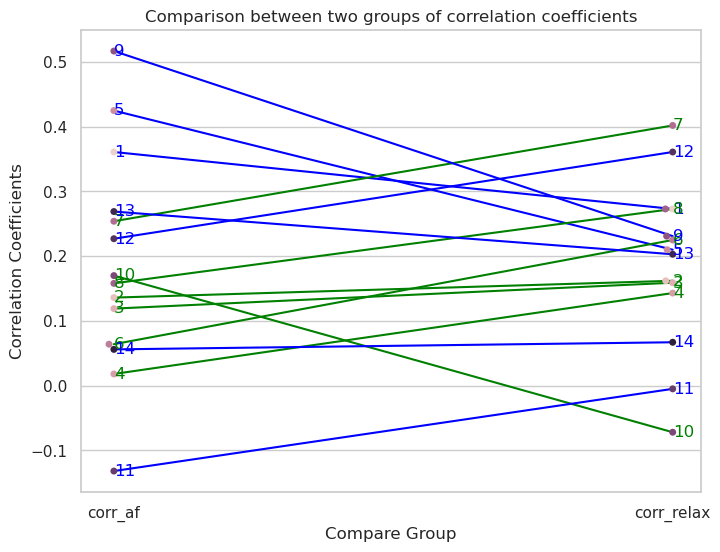

In [4]:
df_corr = pd.read_csv("correlations_csv/rmsd.csv")
df_corr_swarmplot = df_corr.melt(id_vars = 'pair', value_vars = ['corr_af', 'corr_relax'], var_name = 'Groups', value_name = 'Values')

sns.set(style = 'whitegrid')
plt.figure(figsize = (8, 6))
sns.swarmplot(x = 'Groups', y = 'Values', hue = 'pair', data = df_corr_swarmplot)

#colors = sns.color_palette('bright', n_colors = len(df_corr_swarmplot['pair']))

for i, pair in enumerate(df_corr['pair']):
    if df_corr[df_corr['pair']==pair]['indel_num'].iloc[0] == 1:
        subset = df_corr_swarmplot[df_corr_swarmplot['pair'] == pair]
        plt.plot(subset['Groups'], subset['Values'], color = 'green')
        for group, value in zip(subset['Groups'], subset['Values']):
            plt.text(group, value, str(pair), color = 'green', horizontalalignment = 'left', size = 'medium', verticalalignment = 'center')
    if df_corr[df_corr['pair']==pair]['indel_num'].iloc[0] != 1:
        subset = df_corr_swarmplot[df_corr_swarmplot['pair'] == pair]
        plt.plot(subset['Groups'], subset['Values'], color = 'blue')
        for group, value in zip(subset['Groups'], subset['Values']):
            plt.text(group, value, str(pair), color = 'blue', horizontalalignment = 'left', size = 'medium', verticalalignment = 'center')

plt.legend([], [], frameon = False)
plt.title('Comparison between two groups of correlation coefficients')
plt.xlabel('Compare Group')
plt.ylabel('Correlation Coefficients')
plt.show()

# changes in RMSD vs plddt

## iso plddt

### in all pairs

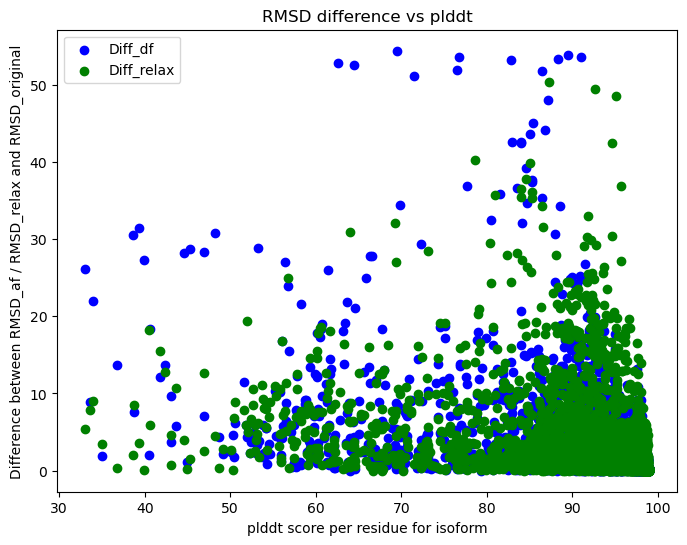

In [66]:
# use plddt_iso for x-axis
pair_all_df = pd.read_csv("pairs_csv/pairs_all.csv")

# Calculate the absolute differences
pair_all_df['Diff_af'] = abs(pair_all_df['RMSD_af'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_relax'] = abs(pair_all_df['RMSD_relax'] - pair_all_df['RMSD_original'])

plt.figure(figsize = (8, 6))
plt.scatter(pair_all_df['plddt_iso'], pair_all_df['Diff_af'], color = 'blue', label = 'Diff_df')
plt.scatter(pair_all_df['plddt_iso'], pair_all_df['Diff_relax'], color = 'green', label = 'Diff_relax')

plt.xlabel('plddt score per residue for isoform')
plt.ylabel('Difference between RMSD_af / RMSD_relax and RMSD_original')
plt.title('RMSD difference vs plddt')

plt.legend()
plt.show()

/scratch/zhu0006/slurm-job.1758323/ipykernel_265117/3851152606.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = pair_all_df.groupby('plddt_bin')['Diff_diff']


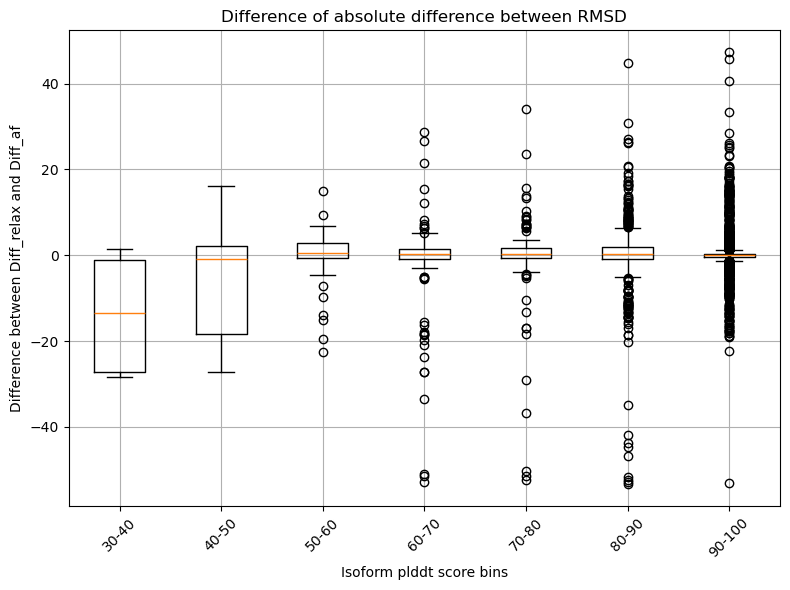

In [27]:
# Load data
pair_all_df = pd.read_csv("pairs_csv/pairs_all.csv")

# Calculate the absolute differences
pair_all_df['Diff_af'] = abs(pair_all_df['RMSD_af'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_relax'] = abs(pair_all_df['RMSD_relax'] - pair_all_df['RMSD_original'])

# Calculate the difference between Diff_relax and Diff_af
pair_all_df['Diff_diff'] = pair_all_df['Diff_relax'] - pair_all_df['Diff_af']

# Define bins for the plddt scores
bins = [30, 40, 50, 60, 70, 80, 90, 100]
pair_all_df['plddt_bin'] = pd.cut(pair_all_df['plddt_iso'], bins=bins, labels=[f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])

# Group by the new bins
grouped = pair_all_df.groupby('plddt_bin')['Diff_diff']

# Prepare data for plotting
data_to_plot = [grouped.get_group(x).values for x in grouped.groups.keys()]

# Labels for boxplot
labels = [x for x in grouped.groups.keys()]

# Create figure and axes
plt.figure(figsize=(8, 6))

# Create boxplot
plt.boxplot(data_to_plot, labels=labels)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel('Isoform plddt score bins')
plt.ylabel('Difference between Diff_relax and Diff_af')
plt.title('Difference of absolute difference between RMSD')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


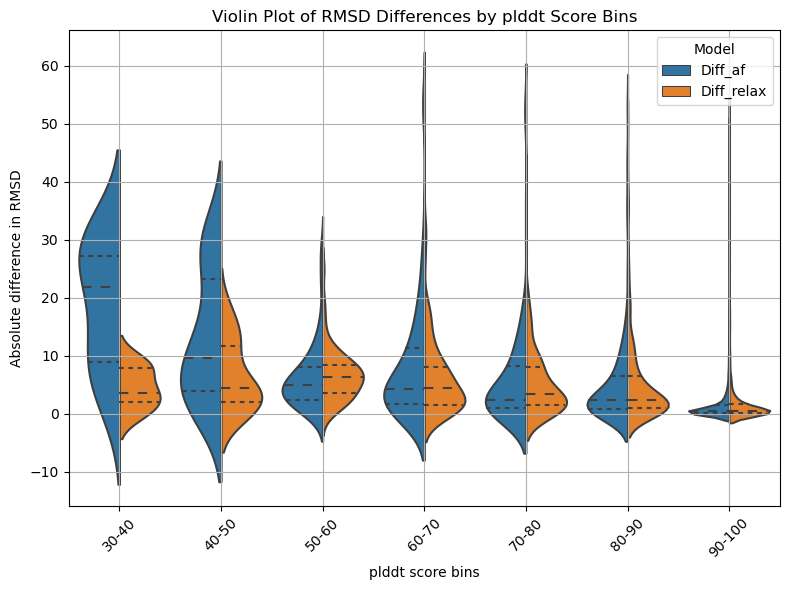

In [29]:
# Load data
pair_all_df = pd.read_csv("pairs_csv/pairs_all.csv")

# Calculate the absolute differences
pair_all_df['Diff_af'] = abs(pair_all_df['RMSD_af'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_relax'] = abs(pair_all_df['RMSD_relax'] - pair_all_df['RMSD_original'])

# Define bins for the plddt scores
bins = [30, 40, 50, 60, 70, 80, 90, 100]
#bins = range(int(pair_all_df['plddt_iso'].min()), int(pair_all_df['plddt_iso'].max()) + 10, 10)
pair_all_df['plddt_bin'] = pd.cut(pair_all_df['plddt_iso'], bins=bins, labels=[f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])

# Reshape the dataframe for easier plotting with seaborn
melted_df = pair_all_df.melt(id_vars=['plddt_bin'], value_vars=['Diff_af', 'Diff_relax'], var_name='Group', value_name='Difference')

# Create figure and axes
plt.figure(figsize=(8, 6))

# Create violin plot
sns.violinplot(x='plddt_bin', y='Difference', hue='Group', data=melted_df, split=True, inner='quartile', scale='width')

# Improve the plot aesthetics
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel('plddt score bins')
plt.ylabel('Absolute difference in RMSD')
plt.title('Violin Plot of RMSD Differences by plddt Score Bins')
plt.grid(True)
plt.legend(title='Model')

# Display the plot
plt.tight_layout()
plt.show()

### in a certain pair

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


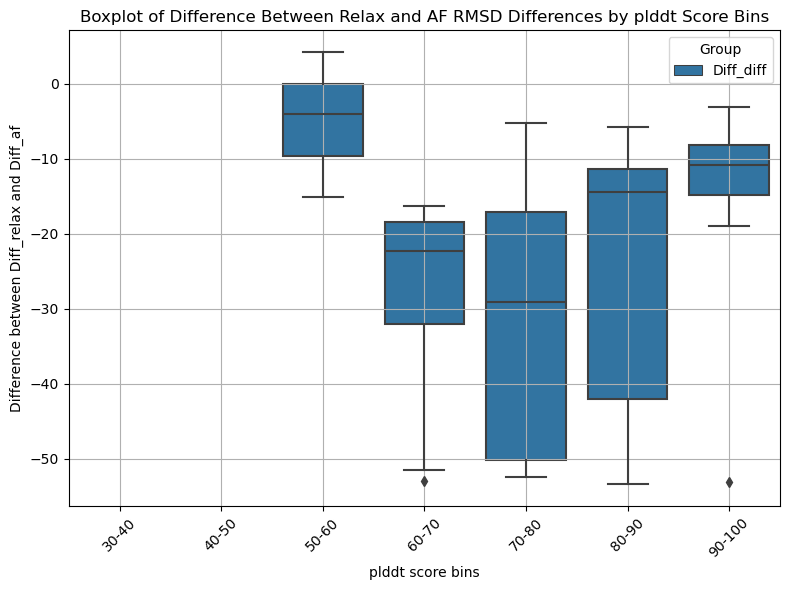

In [58]:
# Load data
pair_df = pd.read_csv("pairs_csv/pair_6.csv")

# Calculate the absolute differences
pair_df['Diff_af'] = abs(pair_df['RMSD_af'] - pair_df['RMSD_original'])
pair_df['Diff_relax'] = abs(pair_df['RMSD_relax'] - pair_df['RMSD_original'])

# Calculate the difference between Diff_relax and Diff_af
pair_df['Diff_diff'] = pair_df['Diff_relax'] - pair_df['Diff_af']

# Define bins for the plddt scores
bins = [30, 40, 50, 60, 70, 80, 90, 100]
pair_df['plddt_bin'] = pd.cut(pair_df['plddt_iso'], bins=bins, labels=[f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])

# Reshape the dataframe for easier plotting with seaborn
melted_df = pair_df.melt(id_vars=['plddt_bin'], value_vars=['Diff_diff'], var_name='Group', value_name='Difference')

# Create figure and axes
plt.figure(figsize=(8, 6))

# Create boxplot
sns.boxplot(x='plddt_bin', y='Difference', hue='Group', data=melted_df)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel('plddt score bins')
plt.ylabel('Difference between Diff_relax and Diff_af')
plt.title('Boxplot of Difference Between Relax and AF RMSD Differences by plddt Score Bins')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


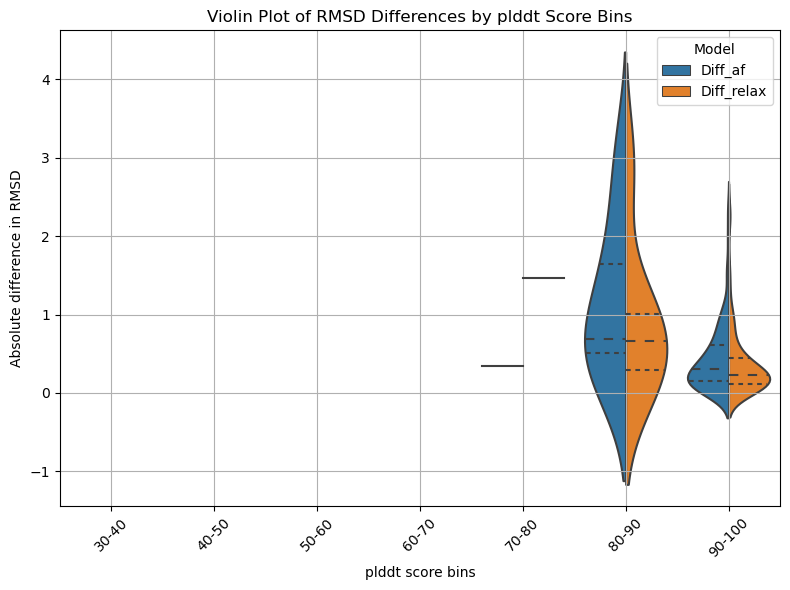

In [48]:
#### within a certain pair ####

# Load data
pair_df = pd.read_csv("pairs_csv/pair_8.csv")

# Calculate the absolute differences
pair_df['Diff_af'] = abs(pair_df['RMSD_af'] - pair_df['RMSD_original'])
pair_df['Diff_relax'] = abs(pair_df['RMSD_relax'] - pair_df['RMSD_original'])

# Define bins for the plddt scores
bins = [30, 40, 50, 60, 70, 80, 90, 100]
pair_df['plddt_bin'] = pd.cut(pair_df['plddt_iso'], bins=bins, labels=[f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])

# Reshape the dataframe for easier plotting with seaborn
melted_df = pair_df.melt(id_vars=['plddt_bin'], value_vars=['Diff_af', 'Diff_relax'], var_name='Group', value_name='Difference')

# Create figure and axes
plt.figure(figsize=(8, 6))

# Create violin plot
sns.violinplot(x='plddt_bin', y='Difference', hue='Group', data=melted_df, split=True, inner='quartile', scale='width')

# Improve the plot aesthetics
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel('plddt score bins')
plt.ylabel('Absolute difference in RMSD')
plt.title('Violin Plot of RMSD Differences by plddt Score Bins')
plt.grid(True)
plt.legend(title='Model')

# Display the plot
plt.tight_layout()
plt.show()

## ref plddt

### in all pairs

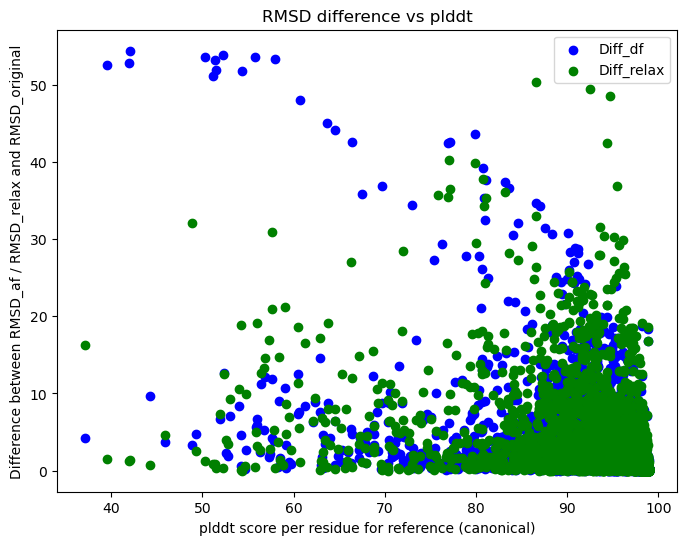

In [69]:
# use plddt_ref for x-axis
pair_all_df = pd.read_csv("pairs_csv/pairs_all.csv")

# Calculate the absolute differences
pair_all_df['Diff_af'] = abs(pair_all_df['RMSD_af'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_relax'] = abs(pair_all_df['RMSD_relax'] - pair_all_df['RMSD_original'])

plt.figure(figsize = (8, 6))
plt.scatter(pair_all_df['plddt_ref'], pair_all_df['Diff_af'], color = 'blue', label = 'Diff_df')
plt.scatter(pair_all_df['plddt_ref'], pair_all_df['Diff_relax'], color = 'green', label = 'Diff_relax')

plt.xlabel('plddt score per residue for reference (canonical)')
plt.ylabel('Difference between RMSD_af / RMSD_relax and RMSD_original')
plt.title('RMSD difference vs plddt')

plt.legend()
plt.show()

/scratch/zhu0006/slurm-job.8547736/ipykernel_124412/2322060254.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = pair_all_df.groupby('plddt_bin')['Diff_diff']


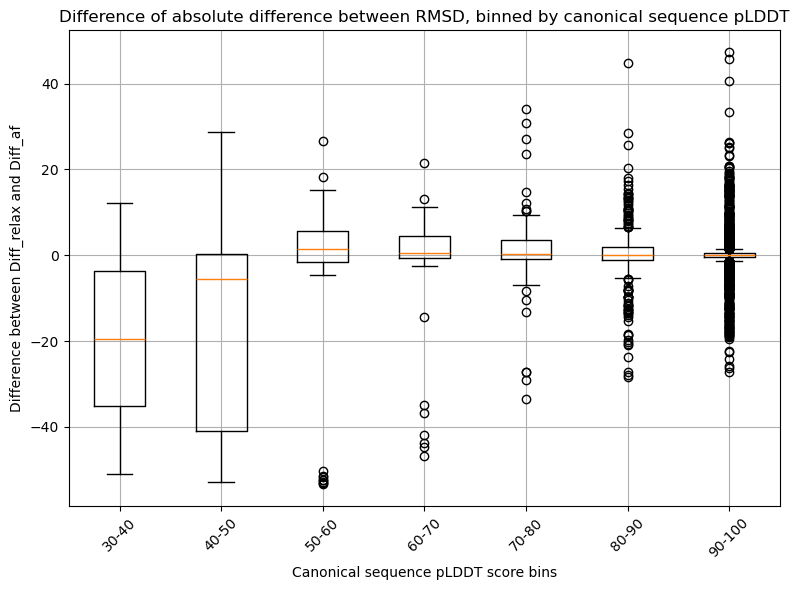

In [10]:
# Load data
pair_all_df = pd.read_csv("pairs_csv/pairs_all.csv")

# Calculate the absolute differences
pair_all_df['Diff_af'] = abs(pair_all_df['RMSD_af'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_relax'] = abs(pair_all_df['RMSD_relax'] - pair_all_df['RMSD_original'])

# Calculate the difference between Diff_relax and Diff_af
pair_all_df['Diff_diff'] = pair_all_df['Diff_relax'] - pair_all_df['Diff_af']

# Define bins for the plddt scores
bins = [30, 40, 50, 60, 70, 80, 90, 100]
pair_all_df['plddt_bin'] = pd.cut(pair_all_df['plddt_ref'], bins=bins, labels=[f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])

# Group by the new bins
grouped = pair_all_df.groupby('plddt_bin')['Diff_diff']

# Prepare data for plotting
data_to_plot = [grouped.get_group(x).values for x in grouped.groups.keys()]

# Labels for boxplot
labels = [x for x in grouped.groups.keys()]

# Create figure and axes
plt.figure(figsize=(8, 6))

# Create boxplot
plt.boxplot(data_to_plot, labels=labels)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel('Canonical sequence pLDDT score bins')
plt.ylabel('Difference between Diff_relax and Diff_af')
plt.title('Difference of absolute difference between RMSD, binned by canonical sequence pLDDT')
plt.grid(True)

# Display the plot
plt.tight_layout()

plt.savefig('plots/DiffRMSDvspLDDT/DiffRMSD_ref_boxplot.png')

plt.show()

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


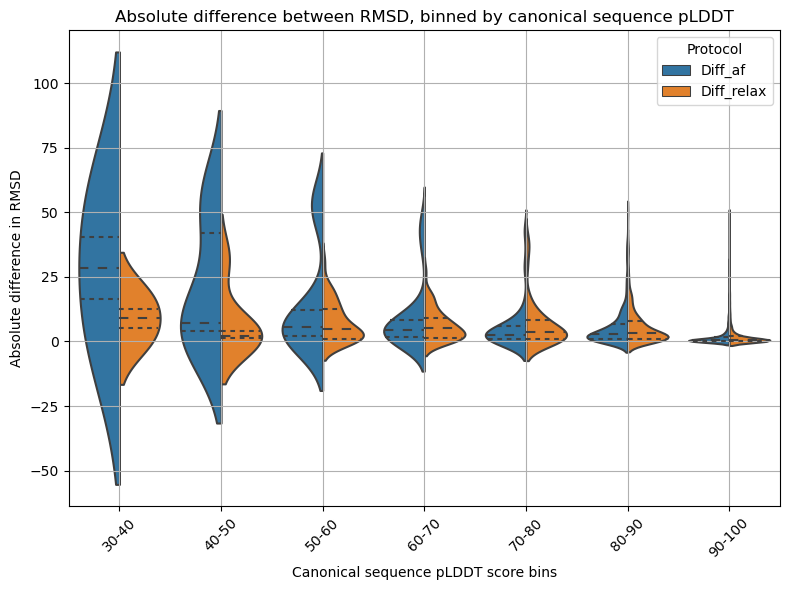

In [15]:
# Load data
pair_all_df = pd.read_csv("pairs_csv/pairs_all.csv")

# Calculate the absolute differences
pair_all_df['Diff_af'] = abs(pair_all_df['RMSD_af'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_relax'] = abs(pair_all_df['RMSD_relax'] - pair_all_df['RMSD_original'])

# Define bins for the plddt scores
bins = [30, 40, 50, 60, 70, 80, 90, 100]
pair_all_df['plddt_bin'] = pd.cut(pair_all_df['plddt_ref'], bins=bins, labels=[f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])

# Reshape the dataframe for easier plotting with seaborn
melted_df = pair_all_df.melt(id_vars=['plddt_bin'], value_vars=['Diff_af', 'Diff_relax'], var_name='Group', value_name='Difference')

# Create figure and axes
plt.figure(figsize=(8, 6))

# Create violin plot
sns.violinplot(x='plddt_bin', y='Difference', hue='Group', data=melted_df, split=True, inner='quartile', scale='width')

# Improve the plot aesthetics
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel('Canonical sequence pLDDT score bins')
plt.ylabel('Absolute difference in RMSD')
plt.title('Absolute difference between RMSD, binned by canonical sequence pLDDT')
plt.grid(True)
plt.legend(title='Protocol')

# Display the plot
plt.tight_layout()

plt.savefig('plots/DiffRMSDvspLDDT/DiffRMSD_ref_violinplot.png')

plt.show()

In [18]:
melted_df[melted_df['Difference']<=0]

,plddt_bin,Group,Difference


### in a certain pair

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


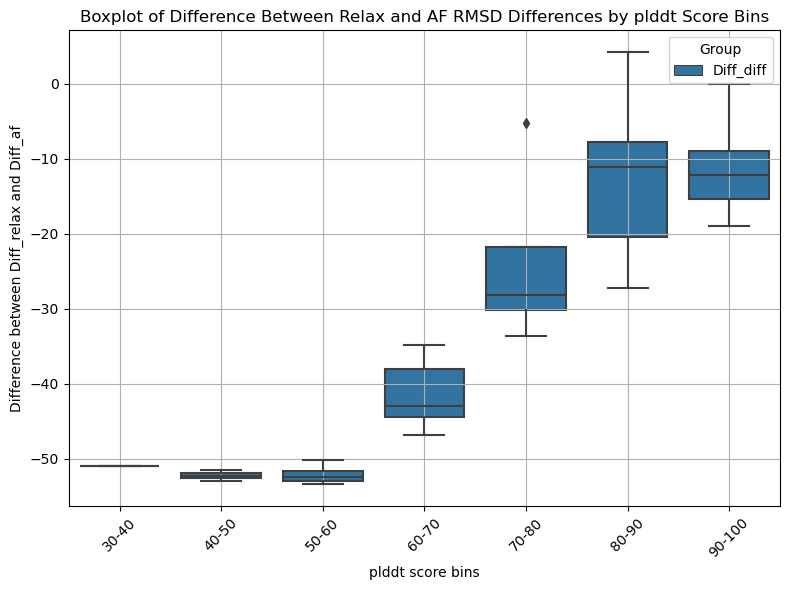

In [59]:
# Load data
pair_df = pd.read_csv("pairs_csv/pair_6.csv")

# Calculate the absolute differences
pair_df['Diff_af'] = abs(pair_df['RMSD_af'] - pair_df['RMSD_original'])
pair_df['Diff_relax'] = abs(pair_df['RMSD_relax'] - pair_df['RMSD_original'])

# Calculate the difference between Diff_relax and Diff_af
pair_df['Diff_diff'] = pair_df['Diff_relax'] - pair_df['Diff_af']

# Define bins for the plddt scores
bins = [30, 40, 50, 60, 70, 80, 90, 100]
pair_df['plddt_bin'] = pd.cut(pair_df['plddt_ref'], bins=bins, labels=[f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])

# Reshape the dataframe for easier plotting with seaborn
melted_df = pair_df.melt(id_vars=['plddt_bin'], value_vars=['Diff_diff'], var_name='Group', value_name='Difference')

# Create figure and axes
plt.figure(figsize=(8, 6))

# Create boxplot
sns.boxplot(x='plddt_bin', y='Difference', hue='Group', data=melted_df)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel('plddt score bins')
plt.ylabel('Difference between Diff_relax and Diff_af')
plt.title('Boxplot of Difference Between Relax and AF RMSD Differences by plddt Score Bins')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


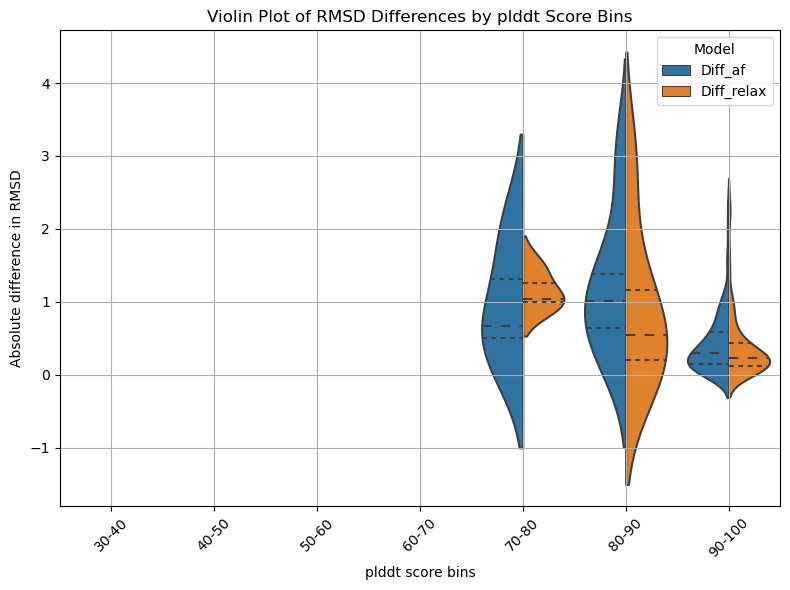

In [47]:
#### within a certain pair ####

# Load data
pair_df = pd.read_csv("pairs_csv/pair_8.csv")

# Calculate the absolute differences
pair_df['Diff_af'] = abs(pair_df['RMSD_af'] - pair_df['RMSD_original'])
pair_df['Diff_relax'] = abs(pair_df['RMSD_relax'] - pair_df['RMSD_original'])

# Define bins for the plddt scores
bins = [30, 40, 50, 60, 70, 80, 90, 100]
pair_df['plddt_bin'] = pd.cut(pair_df['plddt_ref'], bins=bins, labels=[f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])

# Reshape the dataframe for easier plotting with seaborn
melted_df = pair_df.melt(id_vars=['plddt_bin'], value_vars=['Diff_af', 'Diff_relax'], var_name='Group', value_name='Difference')

# Create figure and axes
plt.figure(figsize=(8, 6))

# Create violin plot
sns.violinplot(x='plddt_bin', y='Difference', hue='Group', data=melted_df, split=True, inner='quartile', scale='width')

# Improve the plot aesthetics
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel('plddt score bins')
plt.ylabel('Absolute difference in RMSD')
plt.title('Violin Plot of RMSD Differences by plddt Score Bins')
plt.grid(True)
plt.legend(title='Model')

# Display the plot
plt.tight_layout()
plt.show()

# changes in RMSD vs ddG

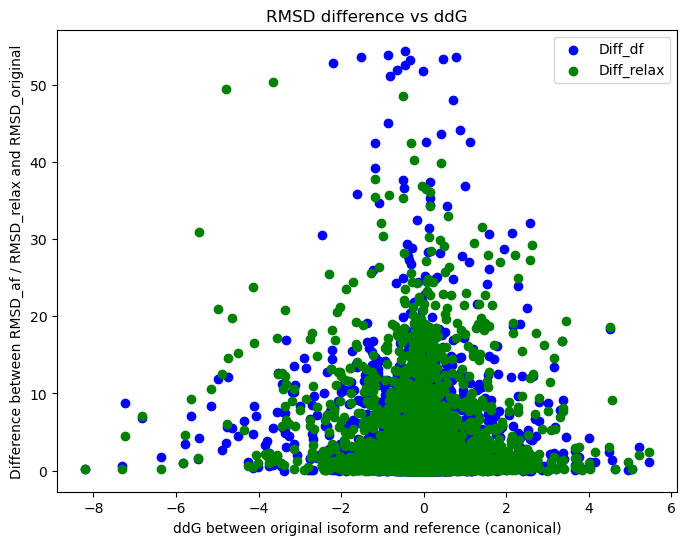

In [27]:
# use ddG for x-axis
pair_all_df = pd.read_csv("pairs_csv/pairs_all.csv")

# Calculate the absolute differences
pair_all_df['Diff_af'] = abs(pair_all_df['RMSD_af'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_relax'] = abs(pair_all_df['RMSD_relax'] - pair_all_df['RMSD_original'])

plt.figure(figsize = (8, 6))
plt.scatter(pair_all_df['ddG_relax'], pair_all_df['Diff_af'], color = 'blue', label = 'Diff_df')
plt.scatter(pair_all_df['ddG_relax'], pair_all_df['Diff_relax'], color = 'green', label = 'Diff_relax')

plt.xlabel('ddG between original isoform and reference (canonical)')
plt.ylabel('Difference between RMSD_af / RMSD_relax and RMSD_original')
plt.title('RMSD difference vs ddG')

plt.legend()
plt.show()

# Difference between RMSD vs Difference between plddt

## in all pairs

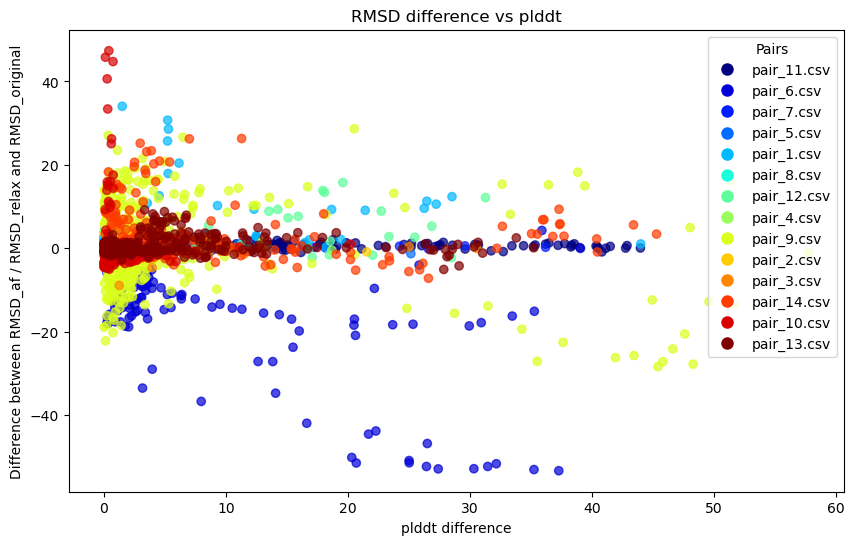

In [72]:
# use plddt difference for x-axis
pair_all_df = pd.read_csv("pairs_csv/pairs_all.csv")

# Calculate the absolute differences
pair_all_df['Diff_plddt'] = abs(pair_all_df['plddt_iso'] - pair_all_df['plddt_ref'])
pair_all_df['Diff_af'] = abs(pair_all_df['RMSD_af'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_relax'] = abs(pair_all_df['RMSD_relax'] - pair_all_df['RMSD_original'])

# Generate color map for pairs
pairs_id = pair_all_df['Pair'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(pairs_id)))
colors_dic = dict(zip(pairs_id, colors))
pair_all_df['color'] = pair_all_df['Pair'].map(colors_dic)

plt.figure(figsize = (10, 6))
plt.scatter(pair_all_df['Diff_plddt'], pair_all_df['Diff_relax']-pair_all_df['Diff_af'], color = pair_all_df['color'], alpha = 0.7)

plt.xlabel('plddt difference')
plt.ylabel('Difference between RMSD_af / RMSD_relax and RMSD_original')
plt.title('RMSD difference vs plddt')

# Legend
handles = [plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = colors_dic[pair], markersize = 10, label = pair) for pair in pairs_id]

plt.legend(handles = handles, title = "Pairs")
plt.show()

/scratch/zhu0006/slurm-job.1758323/ipykernel_265117/369610172.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = pair_all_df.groupby('plddt_bin')['Diff_diff']


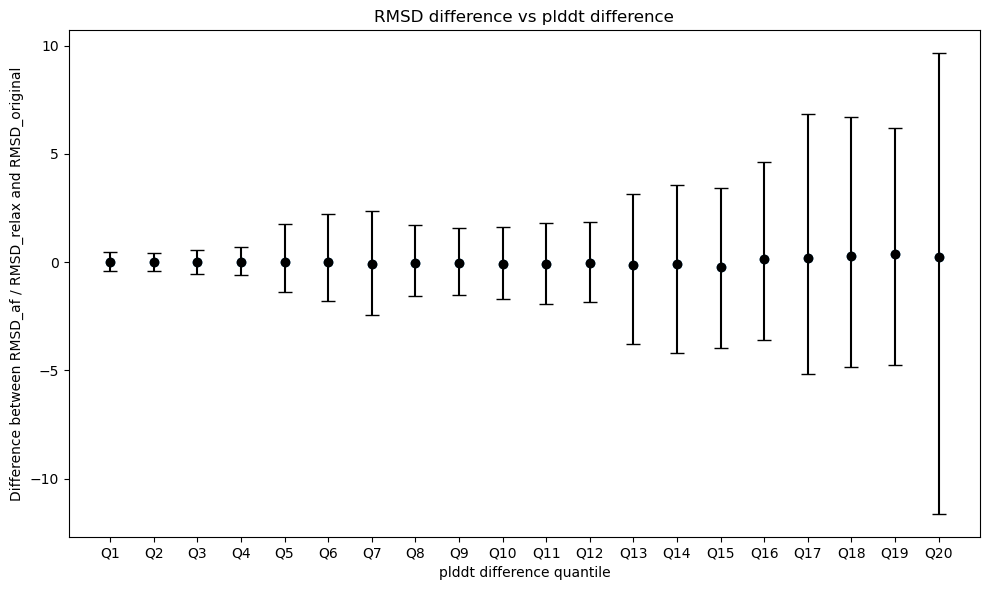

In [4]:
# use plddt difference for x-axis
pair_all_df = pd.read_csv("pairs_csv/pairs_all.csv")

# Calculate the absolute differences
pair_all_df['Diff_plddt'] = abs(pair_all_df['plddt_iso'] - pair_all_df['plddt_ref'])
pair_all_df['Diff_af'] = abs(pair_all_df['RMSD_af'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_relax'] = abs(pair_all_df['RMSD_relax'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_diff'] = pair_all_df['Diff_relax'] - pair_all_df['Diff_af']

# Use quantiles to define the bins
num_bins = 20
pair_all_df['plddt_bin'] = pd.qcut(pair_all_df['Diff_plddt'], q = num_bins, labels = [f"Q{i+1}" for i in range(num_bins)])

# Group by plddt_bin
grouped = pair_all_df.groupby('plddt_bin')['Diff_diff']

# Data preparation for medians and whiskers
medians = grouped.median()
lower_whisker = grouped.apply(lambda x: x.quantile(0.25) - 1.5*(x.quantile(0.75) - x.quantile(0.25)))
upper_whisker = grouped.apply(lambda x: x.quantile(0.75) + 1.5*(x.quantile(0.75) - x.quantile(0.25)))

# Plot
plt.figure(figsize = (10, 6))
plt.scatter(medians.index, medians.values)
plt.errorbar(medians.index, medians.values, yerr = [medians.values - lower_whisker.values, upper_whisker.values - medians.values],
             fmt = 'o', capsize = 5, color = 'black')

plt.xlabel('plddt difference quantile')
plt.ylabel('Difference between RMSD_af / RMSD_relax and RMSD_original')
plt.title('RMSD difference vs plddt difference')

plt.tight_layout()
plt.show()

In [11]:
error_data[error_data['Label']=='pair_11 Q1']['Color'].iloc[0]

'brown'

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


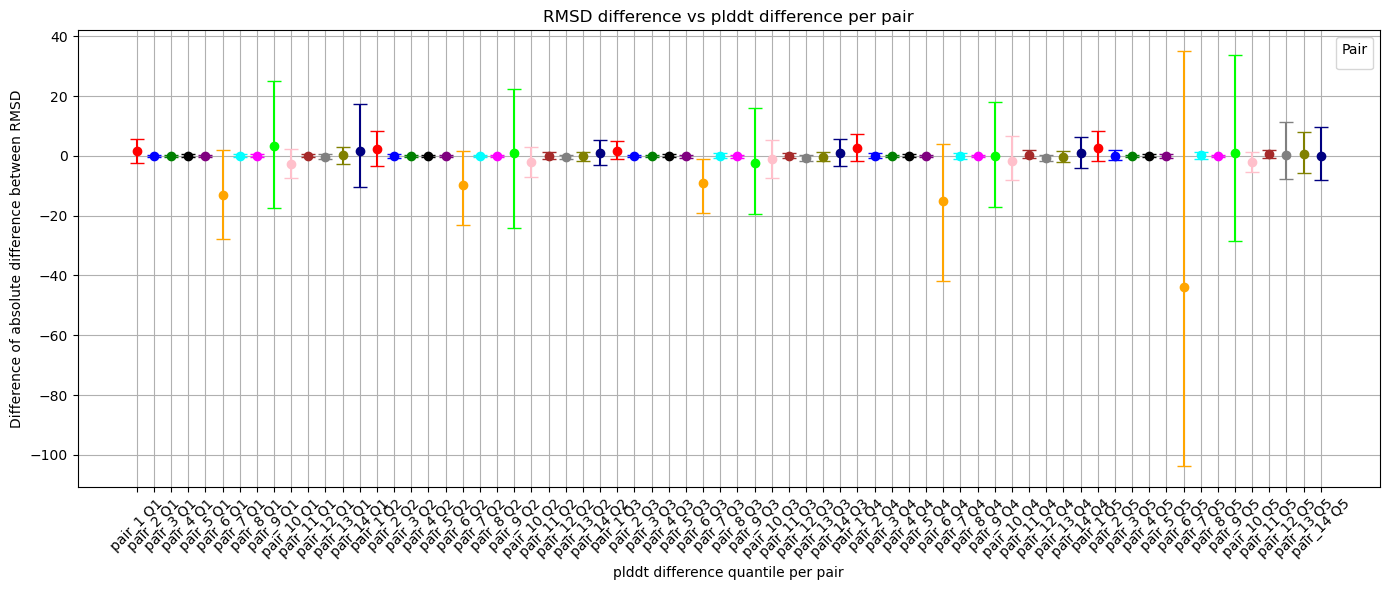

In [12]:
# Load data
pair_all_df = pd.read_csv("pairs_csv/pairs_all.csv")

# Calculate the absolute differences
pair_all_df['Diff_plddt'] = abs(pair_all_df['plddt_iso'] - pair_all_df['plddt_ref'])
pair_all_df['Diff_af'] = abs(pair_all_df['RMSD_af'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_relax'] = abs(pair_all_df['RMSD_relax'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_diff'] = pair_all_df['Diff_relax'] - pair_all_df['Diff_af']

# Pairs in the dataframe
pairs_id = pair_all_df['Pair'].unique()
color_dic = {
    'pair_1.csv': 'red', 
    'pair_2.csv': 'blue', 
    'pair_3.csv': 'green', 
    'pair_4.csv': 'black', 
    'pair_5.csv': 'purple', 
    'pair_6.csv': 'orange', 
    'pair_7.csv': 'cyan', 
    'pair_8.csv': 'magenta', 
    'pair_9.csv': 'lime', 
    'pair_10.csv': 'pink', 
    'pair_11.csv': 'brown', 
    'pair_12.csv': 'gray', 
    'pair_13.csv': 'olive', 
    'pair_14.csv': 'navy'
}

# Prepare a DataFrame to hold all error bar data
error_data = pd.DataFrame()

# For each pair, perform quantile binning and collect data
for pair in pairs_id:
    color_for_pair = color_dic[pair]
    pair_data = pair_all_df[pair_all_df['Pair'] == pair]
    num_bins = 5
    pair_data['plddt_bin'] = pd.qcut(pair_data['Diff_plddt'], q=num_bins, labels=[f"Q{i+1}" for i in range(num_bins)])
    grouped = pair_data.groupby('plddt_bin', observed=False)['Diff_diff']
    medians = grouped.median()
    lower_whisker = grouped.apply(lambda x: x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
    upper_whisker = grouped.apply(lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
    
    for bin_label in medians.index:
        error_data = pd.concat([error_data, pd.DataFrame.from_dict({
            'Pair': pair,
            'Bin': bin_label,
            'Median': medians[bin_label],
            'Lower_Whisker': lower_whisker[bin_label],
            'Upper_Whisker': upper_whisker[bin_label],
            'Color': [color_for_pair],
            'Label': pair.split(".")[0] + " " + bin_label
        })], ignore_index=True)

plt.figure(figsize=(14, 6))

for bin in range(1, 6):
    for pair in range(1, 15):
        current_bar = "pair_" + str(pair) + " Q" + str(bin)
        bar_data = error_data[error_data['Label']==current_bar]
        plt.errorbar(bar_data['Label'], bar_data['Median'], yerr=[bar_data['Median'] - bar_data['Lower_Whisker'], bar_data['Upper_Whisker'] - bar_data['Median']], fmt='o', capsize=5, color = bar_data['Color'].iloc[0])


# Plot aesthetics
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel('plddt difference quantile per pair')
plt.ylabel('Difference of absolute difference between RMSD')
plt.title('RMSD difference vs plddt difference per pair')
plt.legend(title="Pair")
plt.grid(True)
plt.tight_layout()
plt.show()

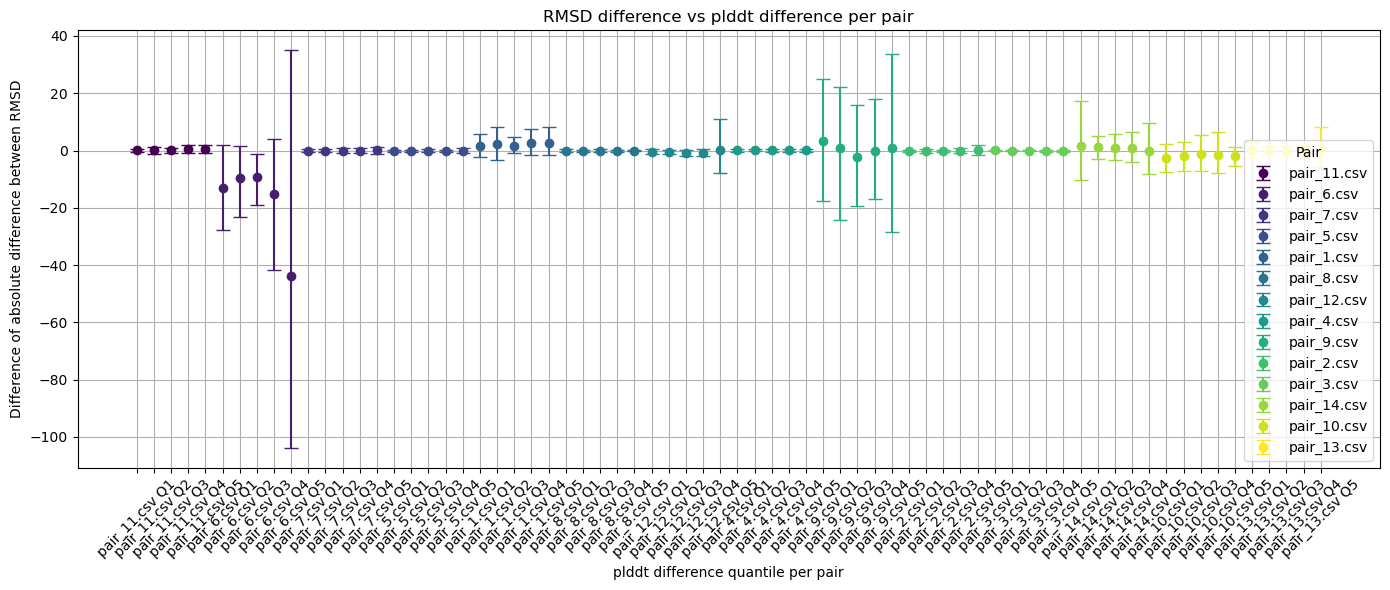

In [31]:
# Load data
pair_all_df = pd.read_csv("pairs_csv/pairs_all.csv")

# Calculate the absolute differences
pair_all_df['Diff_plddt'] = abs(pair_all_df['plddt_iso'] - pair_all_df['plddt_ref'])
pair_all_df['Diff_af'] = abs(pair_all_df['RMSD_af'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_relax'] = abs(pair_all_df['RMSD_relax'] - pair_all_df['RMSD_original'])
pair_all_df['Diff_diff'] = pair_all_df['Diff_relax'] - pair_all_df['Diff_af']

# Pairs in the dataframe
pairs_id = pair_all_df['Pair'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(pairs_id)))  # Color map for visualization
color_dic = dict(zip(pairs_id, colors))

# Figure setup
plt.figure(figsize=(14, 6))

# For each quantile, perform quantile binning and plot
for pair, color in color_dic.items():
    # Filter data for the pair
    pair_data = pair_all_df[pair_all_df['Pair'] == pair]

    # Use quantiles to define the bins
    num_bins = 5
    pair_data['plddt_bin'] = pd.qcut(pair_data['Diff_plddt'], q=num_bins, labels=[f"{pair} Q{i+1}" for i in range(num_bins)])

    # Group by plddt_bin
    grouped = pair_data.groupby('plddt_bin', observed=False)['Diff_diff']

    # Data preparation for medians and whiskers
    medians = grouped.median()
    lower_whisker = grouped.apply(lambda x: x.quantile(0.25) - 1.5*(x.quantile(0.75) - x.quantile(0.25)))
    upper_whisker = grouped.apply(lambda x: x.quantile(0.75) + 1.5*(x.quantile(0.75) - x.quantile(0.25)))

    # Plot medians and error bars for this category
    plt.errorbar(medians.index, medians.values, yerr=[medians.values - lower_whisker.values, upper_whisker.values - medians.values],
                 fmt='o', capsize=5, color=color, label=pair)
    
# Plot aesthetics
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel('plddt difference quantile per pair')
plt.ylabel('Difference of absolute difference between RMSD')
plt.title('RMSD difference vs plddt difference per pair')
plt.legend(title="Pair")
plt.grid(True)
plt.tight_layout()
plt.show()

## within a certain pair

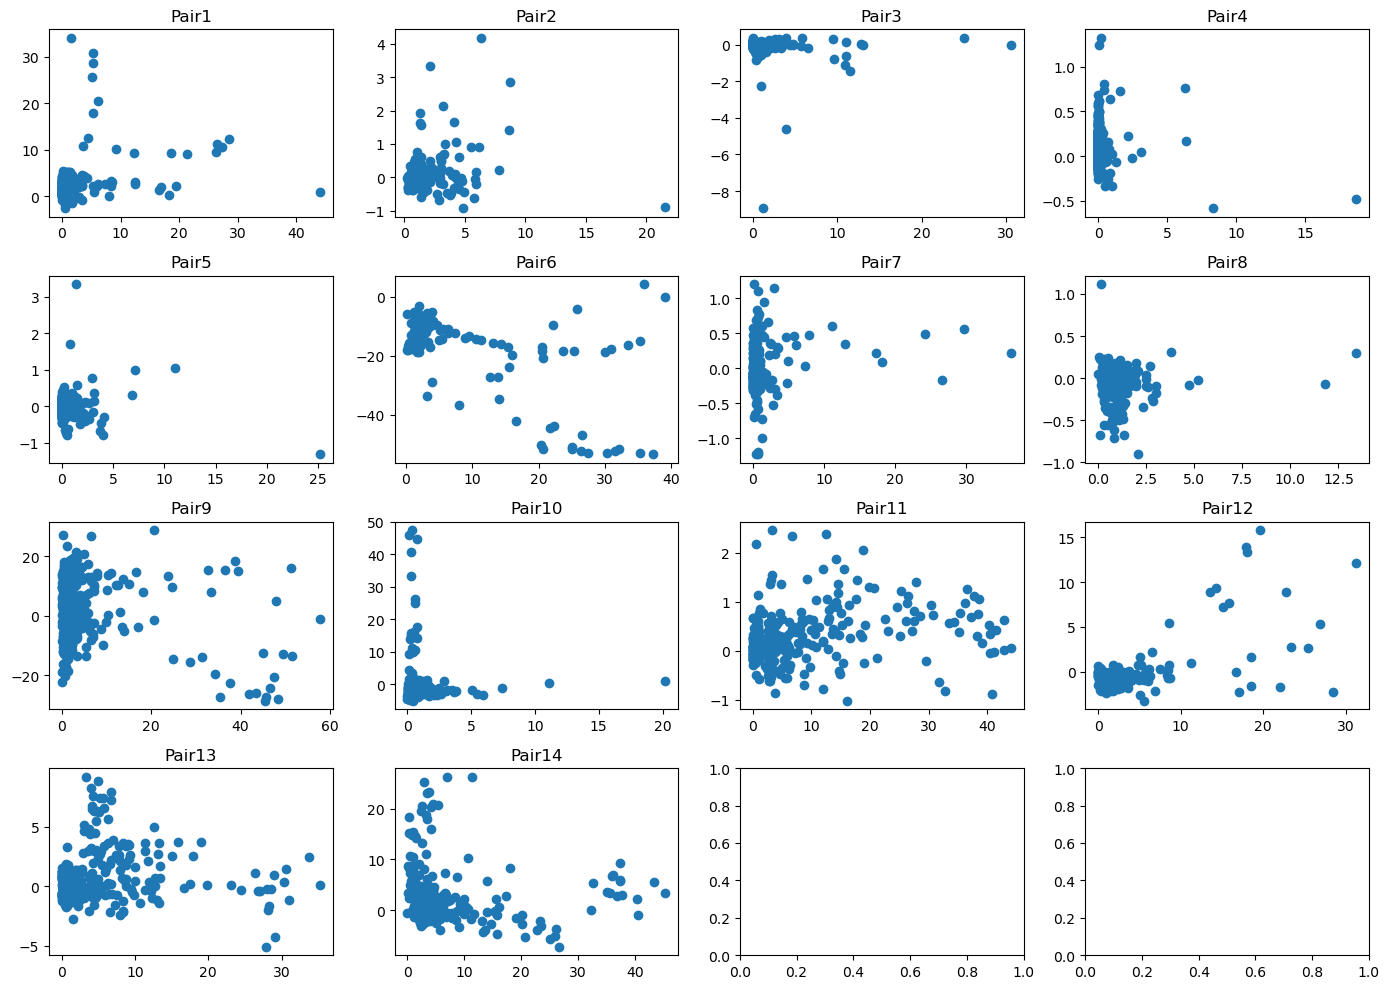

In [30]:
# Plot every pair

fig, axs = plt.subplots(4, 4, figsize = (14, 10))

for i in range(1, 15):
    csv_name = "pair_" + str(i) + ".csv"
    csv_path = os.path.join("pairs_csv", csv_name)
    pair_df = pd.read_csv(csv_path)
    
    pair_df['Diff_plddt'] = abs(pair_df['plddt_iso'] - pair_df['plddt_ref'])
    pair_df['Diff_af'] = abs(pair_df['RMSD_af'] - pair_df['RMSD_original'])
    pair_df['Diff_relax'] = abs(pair_df['RMSD_relax'] - pair_df['RMSD_original'])

    row = i // 4
    col = i % 4 - 1
    if col == -1:
        row = row - 1
        col = 3
    axs[row, col].scatter(pair_df['Diff_plddt'], pair_df['Diff_relax'] - pair_df['Diff_af'])
    title = "Pair" + str(i)
    axs[row, col].set_title(title)
    
plt.tight_layout()
plt.show()

## simple statistical test

In [73]:
from scipy.stats import wilcoxon, ttest_1samp
t, p = ttest_1samp(pair_all_df['Diff_plddt'], 0)
print(p)

4.3567157991765985e-177


In [74]:
np.mean(pair_all_df['Diff_plddt'])

2.9654473630308233

# RSA

## RSA histogram

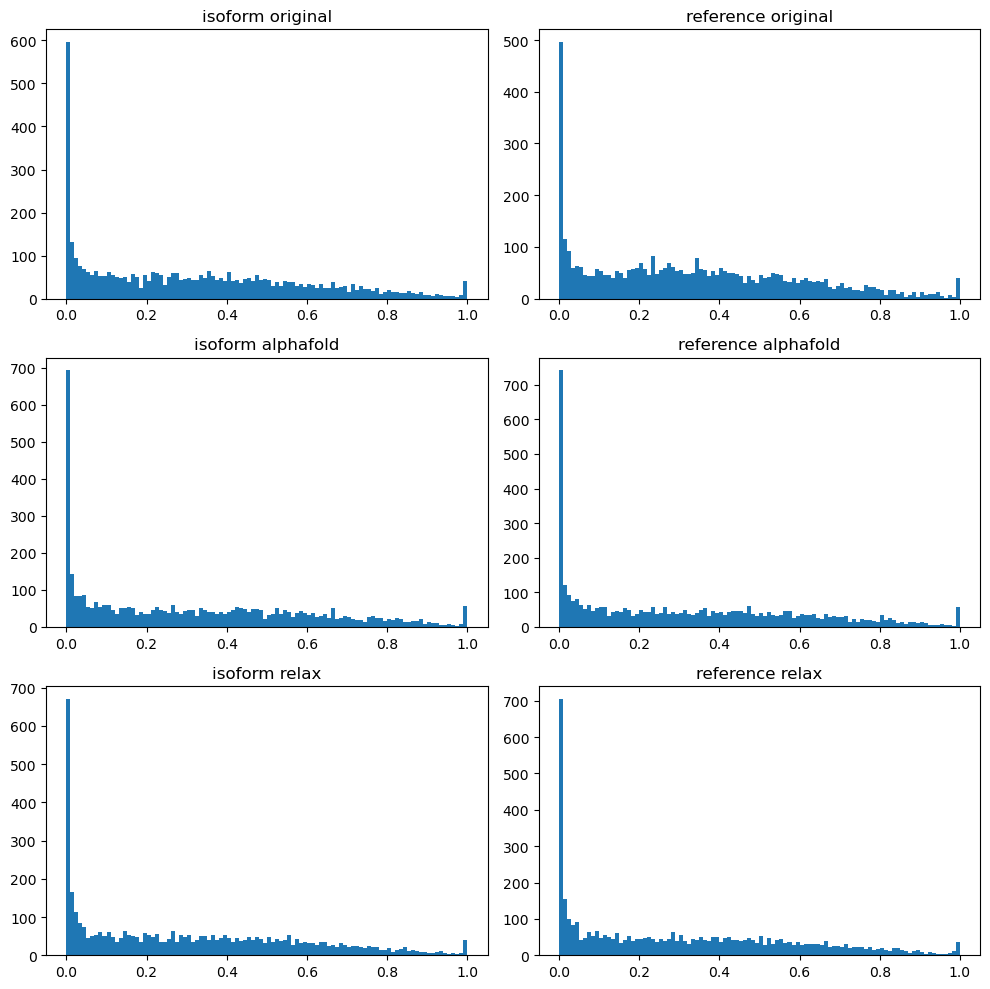

In [12]:
# histogram for RSA values

df = pd.read_csv("pairs_csv/pairs_all.csv")

fig, axs = plt.subplots(3, 2, figsize = (10, 10))

axs[0, 0].hist(df['rsa_iso_original'], bins = 100)
axs[0, 0].set_title('isoform original')

axs[0, 1].hist(df['rsa_ref_original'], bins = 100)
axs[0, 1].set_title('reference original')

axs[1, 0].hist(df['rsa_iso_af'], bins = 100)
axs[1, 0].set_title('isoform alphafold')

axs[1, 1].hist(df['rsa_ref_af'], bins = 100)
axs[1, 1].set_title('reference alphafold')

axs[2, 0].hist(df['rsa_iso_relax'], bins = 100)
axs[2, 0].set_title('isoform relax')

axs[2, 1].hist(df['rsa_ref_relax'], bins = 100)
axs[2, 1].set_title('reference relax')

plt.tight_layout()
plt.show()

## RSA vs dG, in a certain pair

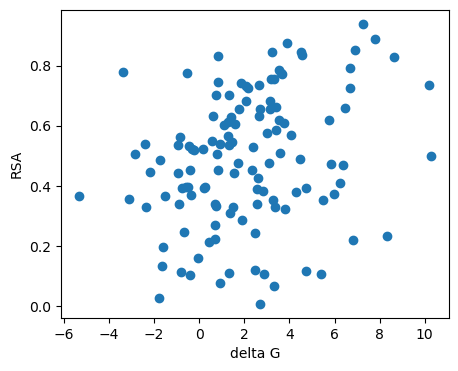

In [6]:
# plot RSA vs dG
# for a certain pair

pair_id = 6
which = "iso"
method = "original"

csv_name = "pair_" + str(pair_id) + ".csv"
csv_path = os.path.join("pairs_csv", csv_name)
rsa_colname = "rsa_" + which + "_" + method
dG_colname = "dG_" + which + "_" + method

df = pd.read_csv(csv_path)
plt.figure(figsize = (5, 4))
plt.scatter(df[dG_colname], df[rsa_colname])

plt.xlabel('delta G')
plt.ylabel('RSA')

plt.show()

## RSA vs dG, in all pairs

In [20]:
# check correlation
df = pd.read_csv("pairs_csv/pairs_all.csv")

# dG vs RSA
print("dG vs RSA")
print(df['dG_iso_original'].corr(df['rsa_iso_original'], method = "kendall"))
print(df['dG_ref_original'].corr(df['rsa_ref_original'], method = "kendall"))
print(df['dG_iso_af'].corr(df['rsa_iso_af'], method = "kendall"))
print(df['dG_ref_af'].corr(df['rsa_ref_af'], method = "kendall"))
print(df['dG_iso_relax'].corr(df['rsa_iso_relax'], method = "kendall"))
print(df['dG_ref_relax'].corr(df['rsa_ref_relax'], method = "kendall"))

dG vs RSA
0.34329134154775653
0.2964019838540269
0.45607758862102415
0.4562781365062076
0.4613191987116431
0.46584167926684605


In [19]:
# check correlation
df = pd.read_csv("pairs_csv/pairs_all.csv")

# dG vs RSA, combine isoform and reference
dG_original = pd.concat([df['dG_iso_original'], df['dG_ref_original']])
dG_af = pd.concat([df['dG_iso_af'], df['dG_ref_af']])
dG_relax = pd.concat([df['dG_iso_relax'], df['dG_ref_relax']])
RSA_original = pd.concat([df['rsa_iso_original'], df['rsa_ref_original']])
RSA_af = pd.concat([df['rsa_iso_af'], df['rsa_ref_af']])
RSA_relax = pd.concat([df['rsa_iso_relax'], df['rsa_ref_relax']])

print(dG_original.corr(RSA_original, method = "kendall"))
print(dG_af.corr(RSA_af, method = "kendall"))
print(dG_relax.corr(RSA_relax, method = "kendall"))

0.3206838098741766
0.4561292645093104
0.46353557463112804


In [21]:
# distinguish correlations in hydrophilic & hydrophobic
df = pd.read_csv("pairs_csv/pairs_all.csv")
hydrophobic = ['W', 'Y', 'F', 'I', 'L', 'M', 'V', 'A', 'C']
neutral = ['T', 'H', 'G', 'S', 'Q']
hydrophilic = ['R', 'E', 'N', 'K', 'P', 'D']
# reference for types: https://www.sigmaaldrich.com/CH/en/technical-documents/technical-article/protein-biology/protein-structural-analysis/amino-acid-reference-chart

subset_hydrophobic = df[df['ResidueType'].isin(hydrophobic)]
subset_hydrophilic = df[df['ResidueType'].isin(hydrophilic)]

print("Hydrophobic:")
print(subset_hydrophobic['dG_iso_original'].corr(subset_hydrophobic['rsa_iso_original'], method = "kendall"))
print(subset_hydrophobic['dG_ref_original'].corr(subset_hydrophobic['rsa_ref_original'], method = "kendall"))
print(subset_hydrophobic['dG_iso_af'].corr(subset_hydrophobic['rsa_iso_af'], method = "kendall"))
print(subset_hydrophobic['dG_ref_af'].corr(subset_hydrophobic['rsa_ref_af'], method = "kendall"))
print(subset_hydrophobic['dG_iso_relax'].corr(subset_hydrophobic['rsa_iso_relax'], method = "kendall"))
print(subset_hydrophobic['dG_ref_relax'].corr(subset_hydrophobic['rsa_ref_relax'], method = "kendall"))

print("Hydrophilic:")
print(subset_hydrophilic['dG_iso_original'].corr(subset_hydrophilic['rsa_iso_original'], method = "kendall"))
print(subset_hydrophilic['dG_ref_original'].corr(subset_hydrophilic['rsa_ref_original'], method = "kendall"))
print(subset_hydrophilic['dG_iso_af'].corr(subset_hydrophilic['rsa_iso_af'], method = "kendall"))
print(subset_hydrophilic['dG_ref_af'].corr(subset_hydrophilic['rsa_ref_af'], method = "kendall"))
print(subset_hydrophilic['dG_iso_relax'].corr(subset_hydrophilic['rsa_iso_relax'], method = "kendall"))
print(subset_hydrophilic['dG_ref_relax'].corr(subset_hydrophilic['rsa_ref_relax'], method = "kendall"))

Hydrophobic:
0.4177015026423043
0.40852102253309663
0.5379596419311075
0.5361341405145539
0.5535468262424127
0.5566337464739918
Hydrophilic:
0.22477049245935907
0.1432451502613694
0.37899419313553934
0.36585425588191817
0.44867301944818966
0.46258991329727833


In [22]:
# distinguish correlations in hydrophilic & hydrophobic
df = pd.read_csv("pairs_csv/pairs_all.csv")
hydrophobic = ['W', 'Y', 'F', 'I', 'L', 'M', 'V', 'A', 'C']
neutral = ['T', 'H', 'G', 'S', 'Q']
hydrophilic = ['R', 'E', 'N', 'K', 'P', 'D']
# reference for types: https://www.sigmaaldrich.com/CH/en/technical-documents/technical-article/protein-biology/protein-structural-analysis/amino-acid-reference-chart

subset_hydrophobic = df[df['ResidueType'].isin(hydrophobic)]
subset_hydrophilic = df[df['ResidueType'].isin(hydrophilic)]

# combine isoform and reference
# Hydrophobic
dG_original = pd.concat([subset_hydrophobic['dG_iso_original'], subset_hydrophobic['dG_ref_original']])
dG_af = pd.concat([subset_hydrophobic['dG_iso_af'], subset_hydrophobic['dG_ref_af']])
dG_relax = pd.concat([subset_hydrophobic['dG_iso_relax'], subset_hydrophobic['dG_ref_relax']])
RSA_original = pd.concat([subset_hydrophobic['rsa_iso_original'], subset_hydrophobic['rsa_ref_original']])
RSA_af = pd.concat([subset_hydrophobic['rsa_iso_af'], subset_hydrophobic['rsa_ref_af']])
RSA_relax = pd.concat([subset_hydrophobic['rsa_iso_relax'], subset_hydrophobic['rsa_ref_relax']])

print(dG_original.corr(RSA_original, method = "kendall"))
print(dG_af.corr(RSA_af, method = "kendall"))
print(dG_relax.corr(RSA_relax, method = "kendall"))

# Hydrophilic
dG_original = pd.concat([subset_hydrophilic['dG_iso_original'], subset_hydrophilic['dG_ref_original']])
dG_af = pd.concat([subset_hydrophilic['dG_iso_af'], subset_hydrophilic['dG_ref_af']])
dG_relax = pd.concat([subset_hydrophilic['dG_iso_relax'], subset_hydrophilic['dG_ref_relax']])
RSA_original = pd.concat([subset_hydrophilic['rsa_iso_original'], subset_hydrophilic['rsa_ref_original']])
RSA_af = pd.concat([subset_hydrophilic['rsa_iso_af'], subset_hydrophilic['rsa_ref_af']])
RSA_relax = pd.concat([subset_hydrophilic['rsa_iso_relax'], subset_hydrophilic['rsa_ref_relax']])

print(dG_original.corr(RSA_original, method = "kendall"))
print(dG_af.corr(RSA_af, method = "kendall"))
print(dG_relax.corr(RSA_relax, method = "kendall"))

0.4154982678949774
0.5370598167062208
0.5549968749300438
0.18440279999606474
0.3723605397326866
0.45550646214978696


In [23]:
# distinguish correlations in different types of residues
df = pd.read_csv("pairs_csv/pairs_all.csv")

aa = list(df['ResidueType'].unique())
corr_aa = pd.DataFrame({
    "ResidueType": aa
})
corr_iso_original = {}
corr_ref_original = {}
corr_iso_af = {}
corr_ref_af = {}
corr_iso_relax = {}
corr_ref_relax = {}

for type in aa:
    subset = df[df['ResidueType']==type]
    
    corr_iso_original[type] = subset['dG_iso_original'].corr(subset['rsa_iso_original'], method = "kendall")
    corr_ref_original[type] = subset['dG_ref_original'].corr(subset['rsa_ref_original'], method = "kendall")
    corr_iso_af[type] = subset['dG_iso_af'].corr(subset['rsa_iso_af'], method = "kendall")
    corr_ref_af[type] = subset['dG_ref_af'].corr(subset['rsa_ref_af'], method = "kendall")
    corr_iso_relax[type] = subset['dG_iso_relax'].corr(subset['rsa_iso_relax'], method = "kendall")
    corr_ref_relax[type] = subset['dG_ref_relax'].corr(subset['rsa_ref_relax'], method = "kendall")

    corr_aa['iso_original'] = corr_aa['ResidueType'].map(corr_iso_original)
    corr_aa['ref_original'] = corr_aa['ResidueType'].map(corr_ref_original)
    corr_aa['iso_af'] = corr_aa['ResidueType'].map(corr_iso_af)
    corr_aa['ref_af'] = corr_aa['ResidueType'].map(corr_ref_af)
    corr_aa['iso_relax'] = corr_aa['ResidueType'].map(corr_iso_relax)
    corr_aa['ref_relax'] = corr_aa['ResidueType'].map(corr_ref_relax)


corr_aa

,ResidueType,iso_original,ref_original,iso_af,ref_af,iso_relax,ref_relax
0,G,0.194525,0.241230,0.248805,0.247718,0.238337,0.250907
1,D,0.278492,0.160434,0.460445,0.463659,0.532312,0.566836
2,R,0.264124,0.148088,0.432715,0.416478,0.456142,0.478975
3,I,0.434589,0.482425,0.522842,0.522901,0.593701,0.595552
4,N,0.241320,0.154095,0.364493,0.332633,0.441899,0.407307
5,T,0.333915,0.340209,0.454327,0.474413,0.502522,0.500252
6,V,0.440225,0.426902,0.544958,0.522342,0.579566,0.569743
7,P,0.164942,0.189499,0.233006,0.196996,0.296501,0.325938
8,E,0.236837,0.157116,0.473021,0.481957,0.564630,0.575342
9,A,0.498981,0.439466,0.583127,0.616893,0.628052,0.640906


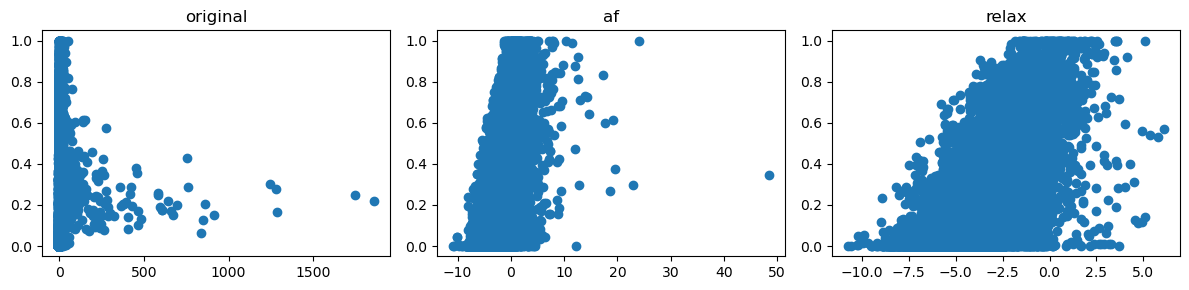

In [2]:
# plot using all data
# x-axis: dG, y-axis: RSA

df = pd.read_csv("pairs_csv/pairs_all.csv")

# dG vs RSA, combine isoform and reference
dG_original = pd.concat([df['dG_iso_original'], df['dG_ref_original']])
dG_af = pd.concat([df['dG_iso_af'], df['dG_ref_af']])
dG_relax = pd.concat([df['dG_iso_relax'], df['dG_ref_relax']])
RSA_original = pd.concat([df['rsa_iso_original'], df['rsa_ref_original']])
RSA_af = pd.concat([df['rsa_iso_af'], df['rsa_ref_af']])
RSA_relax = pd.concat([df['rsa_iso_relax'], df['rsa_ref_relax']])

fig, axs = plt.subplots(1, 3, figsize = (12, 3))

axs[0].scatter(dG_original, RSA_original)
axs[0].set_title('original')

axs[1].scatter(dG_af, RSA_af)
axs[1].set_title('af')

axs[2].scatter(dG_relax, RSA_relax)
axs[2].set_title('relax')

plt.tight_layout()

plt.savefig('plots/RSAvsdG/RSAvsdG_scatter.png')

plt.show()

## RSA vs fa_sol, in all pairs

In [21]:
# check correlation
df = pd.read_csv("pairs_csv_fa_sol/pairs_all.csv")

# dG vs RSA
print("fa_sol vs RSA")
print(df['fa_sol_iso_original'].corr(df['rsa_iso_original']))
print(df['fa_sol_ref_original'].corr(df['rsa_ref_original']))
print(df['fa_sol_iso_af'].corr(df['rsa_iso_af']))
print(df['fa_sol_ref_af'].corr(df['rsa_ref_af']))
print(df['fa_sol_iso_relax'].corr(df['rsa_iso_relax']))
print(df['fa_sol_ref_relax'].corr(df['rsa_ref_relax']))

fa_sol vs RSA
-0.1588673383670121
-0.19310401609112274
-0.14905181827359779
-0.13764016505304275
-0.08904963407684872
-0.08838496223130367


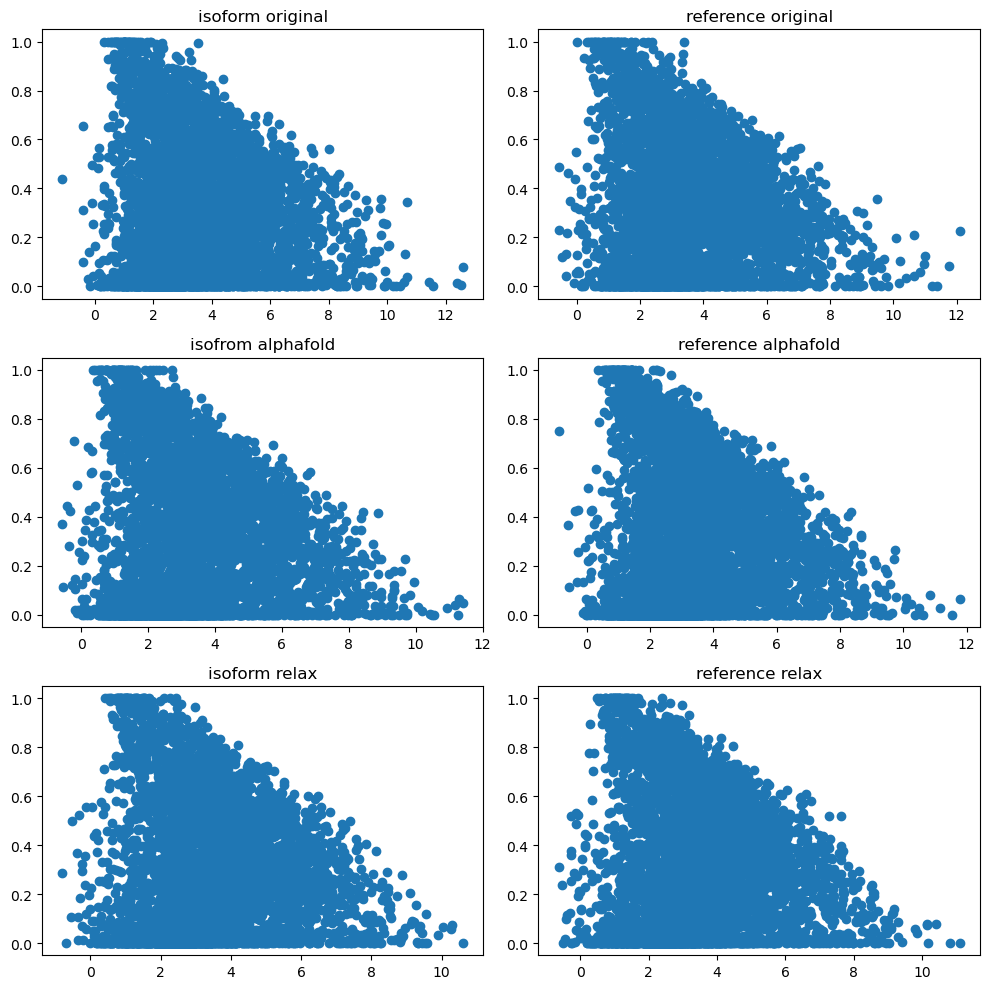

In [3]:
# plot using all data
# x-axis: dG, y-axis: RSA

df = pd.read_csv("pairs_csv_fa_sol/pairs_all.csv")

fig, axs = plt.subplots(3, 2, figsize = (10, 10))

axs[0, 0].scatter(df['fa_sol_iso_original'], df['rsa_iso_original'])
axs[0, 0].set_title('isoform original')

axs[0, 1].scatter(df['fa_sol_ref_original'], df['rsa_ref_original'])
axs[0, 1].set_title('reference original')

axs[1, 0].scatter(df['fa_sol_iso_af'], df['rsa_iso_af'])
axs[1, 0].set_title('isofrom alphafold')

axs[1, 1].scatter(df['fa_sol_ref_af'], df['rsa_ref_af'])
axs[1, 1].set_title('reference alphafold')

axs[2, 0].scatter(df['fa_sol_iso_relax'], df['rsa_iso_relax'])
axs[2, 0].set_title('isoform relax')

axs[2, 1].scatter(df['fa_sol_ref_relax'], df['rsa_ref_relax'])
axs[2, 1].set_title('reference relax')

plt.tight_layout()
plt.show()

## RSA vs plddt

In [13]:
# check correlation
df = pd.read_csv("pairs_csv/pairs_all.csv")

# plddt vs RSA
print("plddt vs RSA")
print(df['plddt_iso'].corr(df['rsa_iso_original']))
print(df['plddt_ref'].corr(df['rsa_ref_original']))
print(df['plddt_iso'].corr(df['rsa_iso_af']))
print(df['plddt_ref'].corr(df['rsa_ref_af']))
print(df['plddt_iso'].corr(df['rsa_iso_relax']))
print(df['plddt_ref'].corr(df['rsa_ref_relax']))

plddt vs RSA
-0.32018957617449195
-0.33259544809984
-0.3510280066575476
-0.3513910443459602
-0.27109378993742217
-0.2944361034143804


In [14]:
# distinguish correlations in hydrophilic & hydrophobic
df = pd.read_csv("pairs_csv/pairs_all.csv")
hydrophobic = ['W', 'Y', 'F', 'I', 'L', 'M', 'V', 'A', 'C']
neutral = ['T', 'H', 'G', 'S', 'Q']
hydrophilic = ['R', 'E', 'N', 'K', 'P', 'D']
# reference for types: https://www.sigmaaldrich.com/CH/en/technical-documents/technical-article/protein-biology/protein-structural-analysis/amino-acid-reference-chart

subset_hydrophobic = df[df['ResidueType'].isin(hydrophobic)]
subset_hydrophilic = df[df['ResidueType'].isin(hydrophilic)]

print("Hydrophobic:")
print(subset_hydrophobic['plddt_iso'].corr(subset_hydrophobic['rsa_iso_original']))
print(subset_hydrophobic['plddt_ref'].corr(subset_hydrophobic['rsa_ref_original']))
print(subset_hydrophobic['plddt_iso'].corr(subset_hydrophobic['rsa_iso_af']))
print(subset_hydrophobic['plddt_ref'].corr(subset_hydrophobic['rsa_ref_af']))
print(subset_hydrophobic['plddt_iso'].corr(subset_hydrophobic['rsa_iso_relax']))
print(subset_hydrophobic['plddt_ref'].corr(subset_hydrophobic['rsa_ref_relax']))

print("Hydrophilic:")
print(subset_hydrophilic['plddt_iso'].corr(subset_hydrophilic['rsa_iso_original']))
print(subset_hydrophilic['plddt_ref'].corr(subset_hydrophilic['rsa_ref_original']))
print(subset_hydrophilic['plddt_iso'].corr(subset_hydrophilic['rsa_iso_af']))
print(subset_hydrophilic['plddt_ref'].corr(subset_hydrophilic['rsa_ref_af']))
print(subset_hydrophilic['plddt_iso'].corr(subset_hydrophilic['rsa_iso_relax']))
print(subset_hydrophilic['plddt_ref'].corr(subset_hydrophilic['rsa_ref_relax']))

Hydrophobic:
-0.4164844317268103
-0.3977526451596439
-0.44228161325705323
-0.3946666045215309
-0.36586013922681027
-0.3289225747524889
Hydrophilic:
-0.2286070736206959
-0.20905095205661786
-0.3310419713743063
-0.3177138535523024
-0.23098721316131068
-0.2649395702424829


## delta RSA vs delta delta G

In [15]:
# in all pairs

df = pd.read_csv("pairs_csv/pairs_all.csv")

df['dRSA_original'] = df['rsa_iso_original'] - df['rsa_ref_original']
df['dRSA_af'] = df['rsa_iso_af'] - df['rsa_ref_af']
df['dRSA_relax'] = df['rsa_iso_relax'] - df['rsa_ref_relax']

print(df['dRSA_original'].corr(df['ddG_original']))
print(df['dRSA_af'].corr(df['ddG_af']))
print(df['dRSA_relax'].corr(df['ddG_relax']))

0.05325172064262227
0.355026381190344
0.5887323337742968


In [16]:
# distinguish correlations in hydrophilic & hydrophobic
df = pd.read_csv("pairs_csv/pairs_all.csv")
hydrophobic = ['W', 'Y', 'F', 'I', 'L', 'M', 'V', 'A', 'C']
neutral = ['T', 'H', 'G', 'S', 'Q']
hydrophilic = ['R', 'E', 'N', 'K', 'P', 'D']

df['dRSA_original'] = df['rsa_iso_original'] - df['rsa_ref_original']
df['dRSA_af'] = df['rsa_iso_af'] - df['rsa_ref_af']
df['dRSA_relax'] = df['rsa_iso_relax'] - df['rsa_ref_relax']

subset_hydrophobic = df[df['ResidueType'].isin(hydrophobic)]
subset_hydrophilic = df[df['ResidueType'].isin(hydrophilic)]

print("Hydrophobic:")
print(subset_hydrophobic['dRSA_original'].corr(subset_hydrophobic['ddG_original']))
print(subset_hydrophobic['dRSA_af'].corr(subset_hydrophobic['ddG_af']))
print(subset_hydrophobic['dRSA_relax'].corr(subset_hydrophobic['ddG_relax']))

print("Hydrophilic:")
print(subset_hydrophilic['dRSA_original'].corr(subset_hydrophilic['ddG_original']))
print(subset_hydrophilic['dRSA_af'].corr(subset_hydrophilic['ddG_af']))
print(subset_hydrophilic['dRSA_relax'].corr(subset_hydrophilic['ddG_relax']))

Hydrophobic:
0.10975248774558849
0.40339960208244857
0.6994957690538861
Hydrophilic:
0.019314193893011325
0.31069406759637885
0.5201443340498295


/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Groups', ylabel='Values'>

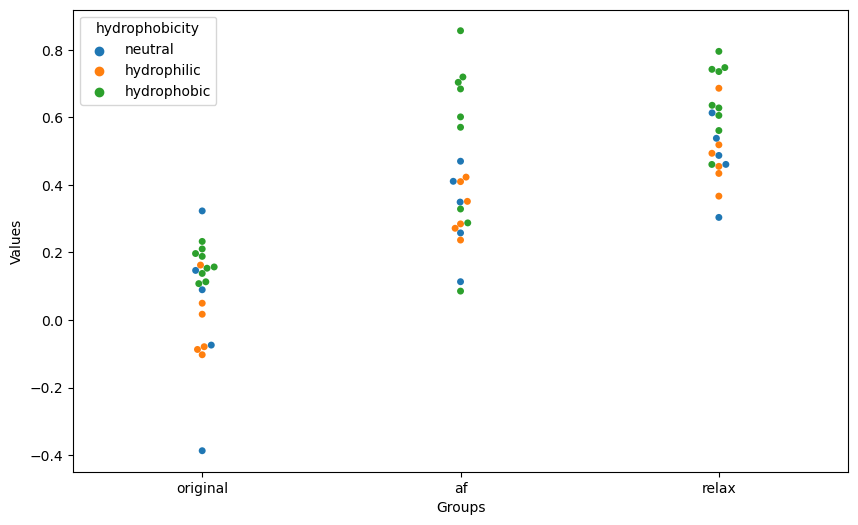

In [17]:
# in different residues

df = pd.read_csv("pairs_csv/pairs_all.csv")

df['dRSA_original'] = df['rsa_iso_original'] - df['rsa_ref_original']
df['dRSA_af'] = df['rsa_iso_af'] - df['rsa_ref_af']
df['dRSA_relax'] = df['rsa_iso_relax'] - df['rsa_ref_relax']

aa_dict = {'W': 'hydrophobic',
           'Y': 'hydrophobic',
           'F': 'hydrophobic',
           'I': 'hydrophobic',
           'L': 'hydrophobic',
           'M': 'hydrophobic',
           'V': 'hydrophobic',
           'A': 'hydrophobic',
           'C': 'hydrophobic',
           'T': 'neutral',
           'H': 'neutral',
           'G': 'neutral',
           'S': 'neutral',
           'Q': 'neutral',
           'R': 'hydrophilic',
           'E': 'hydrophilic',
           'N': 'hydrophilic',
           'K': 'hydrophilic',
           'P': 'hydrophilic',
           'D': 'hydrophilic'}

aa = list(df['ResidueType'].unique())
corr_aa = pd.DataFrame({
    "ResidueType": aa
})
corr_aa['hydrophobicity'] = corr_aa['ResidueType'].map(aa_dict)
corr_original = {}
corr_af = {}
corr_relax = {}

for type in aa:
    subset = df[df['ResidueType']==type]

    corr_original[type] = subset['dRSA_original'].corr(subset['ddG_original'])
    corr_af[type] = subset['dRSA_af'].corr(subset['ddG_af'])
    corr_relax[type] = subset['dRSA_relax'].corr(subset['ddG_relax'])

    corr_aa['original'] = corr_aa['ResidueType'].map(corr_original)
    corr_aa['af'] = corr_aa['ResidueType'].map(corr_af)
    corr_aa['relax'] = corr_aa['ResidueType'].map(corr_relax)

# prepare for swarmplot
corr_aa_melted = corr_aa.melt(id_vars = 'hydrophobicity', value_vars = ['original', 'af', 'relax'], var_name = 'Groups', value_name = 'Values')

plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'Groups', y = 'Values', hue = 'hydrophobicity', data = corr_aa_melted)

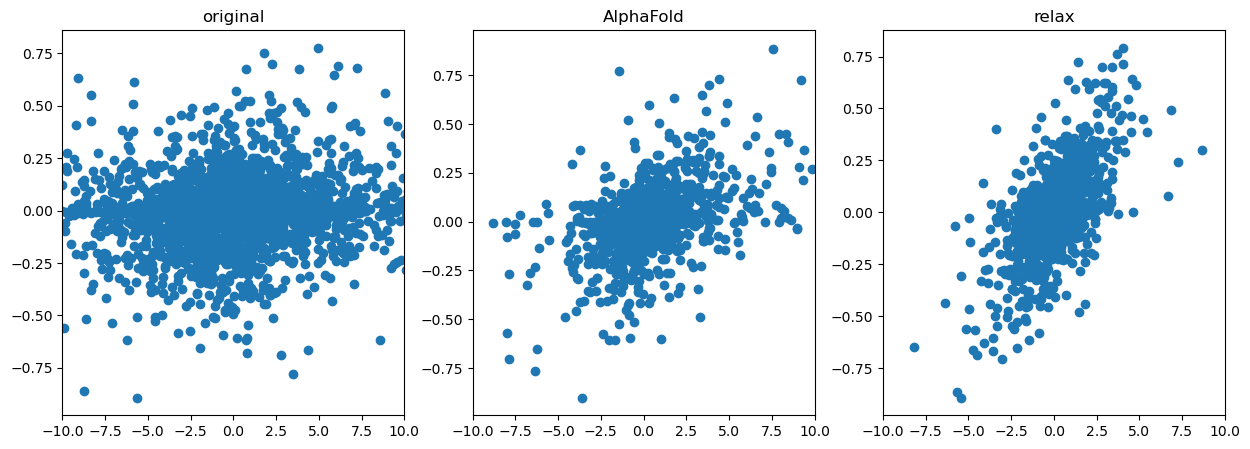

In [18]:
# plot using all data
# x-axis: ddG, y-axis: dRSA

df = pd.read_csv("pairs_csv/pairs_all.csv")

df['dRSA_original'] = df['rsa_iso_original'] - df['rsa_ref_original']
df['dRSA_af'] = df['rsa_iso_af'] - df['rsa_ref_af']
df['dRSA_relax'] = df['rsa_iso_relax'] - df['rsa_ref_relax']

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].scatter(df['ddG_original'], df['dRSA_original'])
axs[0].set_xlim(left = -10, right = 10)
axs[0].set_title('original')

axs[1].scatter(df['ddG_af'], df['dRSA_af'])
axs[1].set_xlim(left = -10, right = 10)
axs[1].set_title('AlphaFold')

axs[2].scatter(df['ddG_relax'], df['dRSA_relax'])
axs[2].set_xlim(left = -10, right = 10)
axs[2].set_title('relax')

plt.show()

## delta RSA vs delta plddt

In [19]:
# in all pairs

df = pd.read_csv("pairs_csv/pairs_all.csv")

df['dRSA_original'] = df['rsa_iso_original'] - df['rsa_ref_original']
df['dRSA_af'] = df['rsa_iso_af'] - df['rsa_ref_af']
df['dRSA_relax'] = df['rsa_iso_relax'] - df['rsa_ref_relax']
df['delta_plddt'] = df['plddt_iso'] - df['plddt_ref']

print(df['dRSA_original'].corr(df['delta_plddt']))
print(df['dRSA_af'].corr(df['delta_plddt']))
print(df['dRSA_relax'].corr(df['delta_plddt']))

-0.2402416944605588
-0.4326932105394143
-0.16787172063039882


In [20]:
df = pd.read_csv("pairs_csv/pairs_all.csv")

df['dRSA_original'] = df['rsa_iso_original'] - df['rsa_ref_original']
df['dRSA_af'] = df['rsa_iso_af'] - df['rsa_ref_af']
df['dRSA_relax'] = df['rsa_iso_relax'] - df['rsa_ref_relax']
df['delta_plddt'] = df['plddt_iso'] - df['plddt_ref']

aa = list(df['ResidueType'].unique())
corr_aa = pd.DataFrame({
    "ResidueType": aa
})
corr_original = {}
corr_af = {}
corr_relax = {}

for type in aa:
    subset = df[df['ResidueType']==type]

    corr_original[type] = subset['dRSA_original'].corr(subset['delta_plddt'])
    corr_af[type] = subset['dRSA_af'].corr(subset['delta_plddt'])
    corr_relax[type] = subset['dRSA_relax'].corr(subset['delta_plddt'])

    corr_aa['original'] = corr_aa['ResidueType'].map(corr_original)
    corr_aa['af'] = corr_aa['ResidueType'].map(corr_af)
    corr_aa['relax'] = corr_aa['ResidueType'].map(corr_relax)


corr_aa

,ResidueType,original,af,relax
0,G,-0.172641,-0.305615,-0.069432
1,D,0.030287,-0.294019,-0.014009
2,R,-0.277146,-0.389011,-0.161454
3,I,-0.354066,-0.502586,-0.224815
4,N,-0.259281,-0.398692,-0.098260
5,T,-0.117875,-0.418459,-0.015001
6,V,-0.341171,-0.396060,-0.124584
7,P,-0.198050,-0.309516,-0.178904
8,E,-0.297515,-0.425096,-0.102808
9,A,-0.241704,-0.441963,-0.216893
